# AQI Delhi 2012 Dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('cpcb_dly_aq_delhi-2012.csv', index_col=1, parse_dates=True)
df.head()

,Stn Code,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM
Sampling Date,,,,,,,,,,
1/7/2012,144,Delhi,Delhi,"N.Y. SCHOOL, Sarojini Nagar, Delhi",National Environmental Engineering Research In...,"Residential, Rural and other Areas",5,54,137,NaN
1/8/2012,144,Delhi,Delhi,"N.Y. SCHOOL, Sarojini Nagar, Delhi",National Environmental Engineering Research In...,"Residential, Rural and other Areas",2,78,179,NaN
14/01/2012,144,Delhi,Delhi,"N.Y. SCHOOL, Sarojini Nagar, Delhi",National Environmental Engineering Research In...,"Residential, Rural and other Areas",7,99,296,NaN
15/01/2012,144,Delhi,Delhi,"N.Y. SCHOOL, Sarojini Nagar, Delhi",National Environmental Engineering Research In...,"Residential, Rural and other Areas",8,101,169,NaN
16/01/2012,144,Delhi,Delhi,"N.Y. SCHOOL, Sarojini Nagar, Delhi",National Environmental Engineering Research In...,"Residential, Rural and other Areas",2,92,161,NaN


In [2]:
# dataset exploration
print("Dataset Shape: ", df.shape, "\n")
print("Dataset Size: ", df.size, "\n")
print("Dataset Columns: ", df.columns, "\n")
print("Dataset Index: ", df.index, "\n")
print("Dataset Datatypes: ", df.dtypes, "\n")
print("Dataset Memory Usage: ", df.memory_usage(), "\n")
print("Dataset Description: ", df.describe(), "\n")

Dataset Shape:  (288, 10) 

Dataset Size:  2880 

Dataset Columns:  Index(['Stn Code', 'State', 'City/Town/Village/Area',
       'Location of Monitoring Station', 'Agency', 'Type of Location', 'SO2',
       'NO2', 'RSPM/PM10', 'SPM'],
      dtype='object') 

Dataset Index:  Index(['1/7/2012', '1/8/2012', '14/01/2012', '15/01/2012', '16/01/2012',
       '27/01/2012', '28/01/2012', '29/01/2012', '2/1/2012', '2/2/2012',
       ...
       '28/11/2012', '29/11/2012', '12/11/2012', '12/12/2012', '13/12/2012',
       '20/12/2012', '21/12/2012', '22/12/2012', '26/12/2012', '27/12/2012'],
      dtype='object', name='Sampling Date', length=288) 

Dataset Datatypes:  Stn Code                            int64
State                              object
City/Town/Village/Area             object
Location of Monitoring Station     object
Agency                             object
Type of Location                   object
SO2                                 int64
NO2                                 int64

In [3]:
print("Unique values in each column: \n")
for col in df.columns:
    print(col, " : ", df[col].nunique())
    
print("\nNull values in each column: \n")
print(df.isnull().sum())

Unique values in each column: 

Stn Code  :  3
State  :  1
City/Town/Village/Area  :  1
Location of Monitoring Station  :  3
Agency  :  1
Type of Location  :  2
SO2  :  32
NO2  :  105
RSPM/PM10  :  216
SPM  :  0

Null values in each column: 

Stn Code                            0
State                               0
City/Town/Village/Area              0
Location of Monitoring Station      0
Agency                              0
Type of Location                    0
SO2                                 0
NO2                                 0
RSPM/PM10                           0
SPM                               288
dtype: int64


In [4]:
print("\nUnique values in Type of Location: \n")
print(df['Type of Location'].unique())
print("\nUnique values in Location of Monitoring Station: \n")
print(df['Location of Monitoring Station'].unique())


Unique values in Type of Location: 

['Residential, Rural and other Areas' 'Industrial Area']

Unique values in Location of Monitoring Station: 

['N.Y. SCHOOL, Sarojini Nagar, Delhi'
 'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi'
 'Mayapuri Industrial Area, Delhi']


In [5]:
# drop the State, City/Town/Village/Area, Agency
df = df.drop(['State', 'City/Town/Village/Area', 'Agency', "SPM", "Stn Code"], axis=1)

In [6]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type of Location'] = le.fit_transform(df['Type of Location'])
df['Location of Monitoring Station'] = le.fit_transform(df['Location of Monitoring Station'])
# show th dataframe after label encoding from 50 to 70
df.tail(30)

,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10
Sampling Date,,,,,
9/6/2012,0,0,2,36,70
9/12/2012,0,0,2,55,123
13/09/2012,0,0,2,23,91
14/09/2012,0,0,2,26,41
25/09/2012,0,0,2,69,211
26/09/2012,0,0,2,58,158
10/9/2012,0,0,18,118,311
10/10/2012,0,0,15,110,348
10/11/2012,0,0,6,117,325


In [7]:
# edit the index value to delete the 2012 ath the end of each date
df.index = df.index.str.replace('/2012', '')
# replace every /01 with /1
df.index = df.index.str.replace('/1', '/01')
df.index = df.index.str.replace('/011', '/11')
df.index = df.index.str.replace('/010', '/10')
# replace every /02 with /2
df.index = df.index.str.replace('/2', '/02')
df.index = df.index.str.replace('/012', '/12')
# replace every /03 with /3 
df.index = df.index.str.replace('/3', '/03')
# replace every /04 with /4
df.index = df.index.str.replace('/4', '/04')
# replace every /05 with /5
df.index = df.index.str.replace('/5', '/05')
# replace every /06 with /6
df.index = df.index.str.replace('/6', '/06')
# replace every /07 with /7
df.index = df.index.str.replace('/7', '/07')
# replace every /08 with /8
df.index = df.index.str.replace('/8', '/08')
# replace every /09 with /9
df.index = df.index.str.replace('/9', '/09')
# print all the unique values in the index
print(df.index.unique())

Index(['1/07', '1/08', '14/01', '15/01', '16/01', '27/01', '28/01', '29/01',
       '2/01', '2/02',
       ...
       '23/07', '27/07', '28/07', '24/08', '25/08', '10/11', '11/03', '27/11',
       '28/11', '29/11'],
      dtype='object', name='Sampling Date', length=174)


In [8]:
# edit the index from DD/MM to MM/DD
df.index = pd.to_datetime(df.index, format='%d/%m').strftime('%m/%d')
# sort the index
df.head()

,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10
Sampling Date,,,,,
07/01,1,1,5,54,137
08/01,1,1,2,78,179
01/14,1,1,7,99,296
01/15,1,1,8,101,169
01/16,1,1,2,92,161


In [9]:
df = df.sort_index()
df.tail(20)

,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10
Sampling Date,,,,,
12/07,2,1,2,49,69
12/07,1,1,2,71,37
12/09,0,0,2,55,123
12/09,1,1,2,34,63
12/12,0,0,15,70,291
12/12,2,1,4,91,193
12/13,2,1,4,101,179
12/13,0,0,7,81,164
12/20,1,1,2,93,175


In [10]:
df.index = pd.to_datetime(df.index, format='%m/%d').strftime('%d/%m')
df.tail(20)

,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10
Sampling Date,,,,,
07/12,2,1,2,49,69
07/12,1,1,2,71,37
09/12,0,0,2,55,123
09/12,1,1,2,34,63
12/12,0,0,15,70,291
12/12,2,1,4,91,193
13/12,2,1,4,101,179
13/12,0,0,7,81,164
20/12,1,1,2,93,175


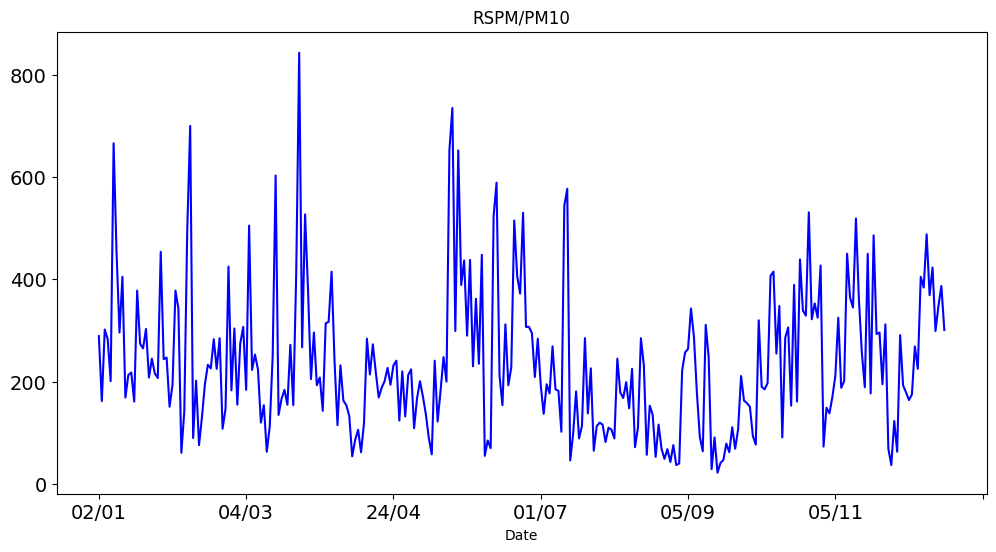

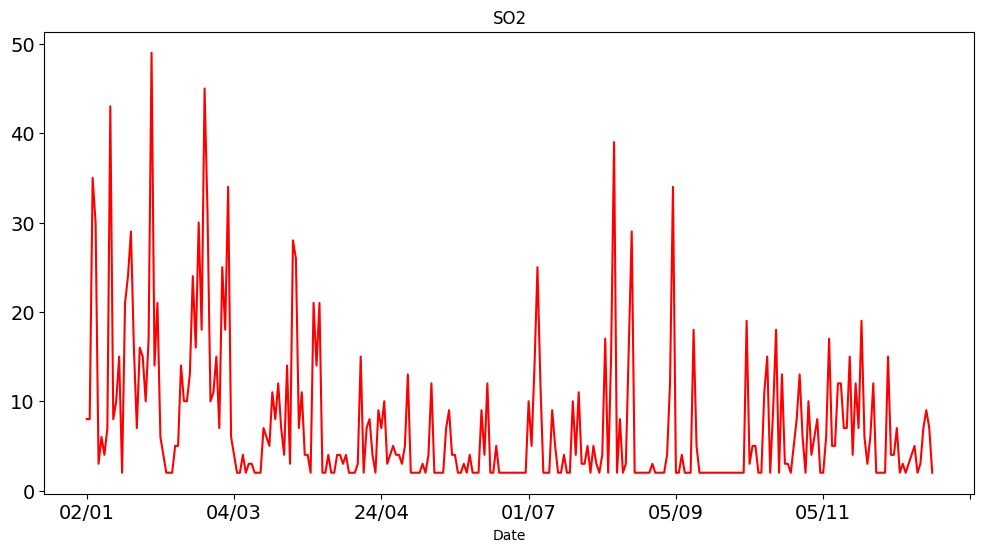

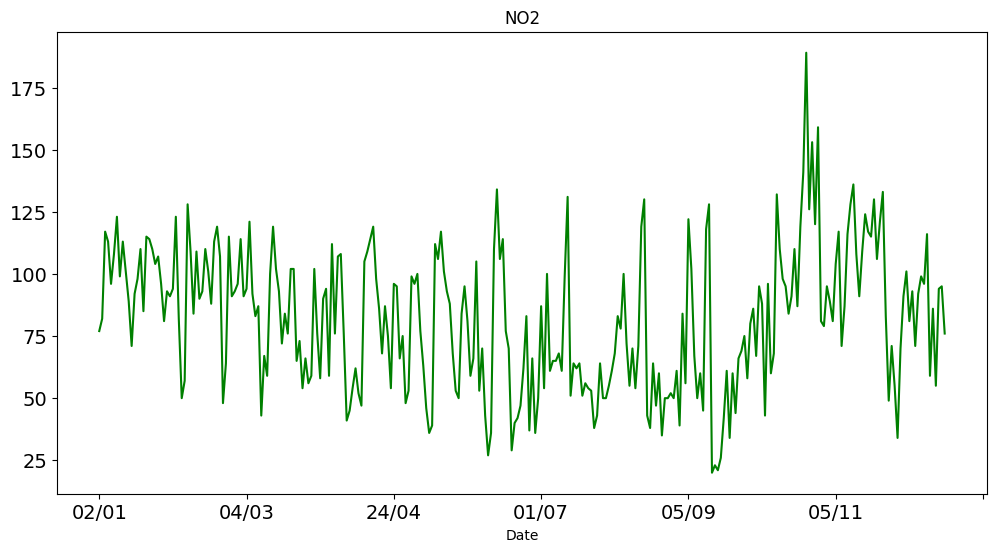

In [11]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

def plot_timeseries(df, title, color):
    '''Plot time series data'''
    ax = df.plot(figsize=(12,6), title=title, fontsize=14, color=color)
    ax.set_xlabel('Date')
    plt.show()

plot_timeseries(df['RSPM/PM10'], 'RSPM/PM10', 'blue')
plot_timeseries(df['SO2'], 'SO2', 'red')
plot_timeseries(df['NO2'], 'NO2', 'green')


# Basic Models (Bad Performence)

Training Score:  0.18556249816469395
Testing Score:  0.4069242052863824
Mean Squared Error:  10187.560913277284
R2 Score:  0.4069242052863824


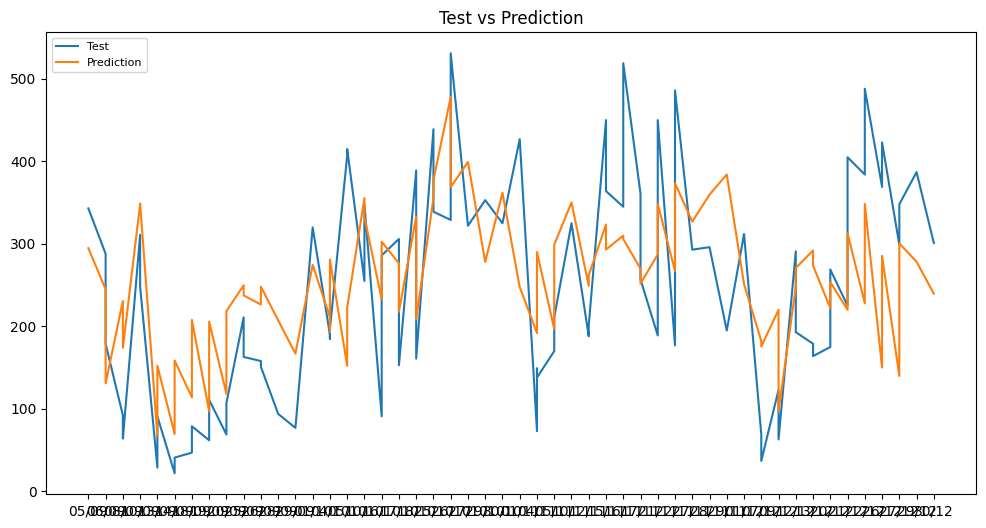

In [12]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def visualize_results(y_pred, y_test):
    '''Plot predictions vs actual values'''
    plt.figure(figsize=(12,6))
    plt.plot(y_test.index, y_test, label='Test')    
    plt.plot(y_test.index, y_pred, label='Prediction')
    plt.legend(loc='upper left', fontsize=8)
    plt.title("Test vs Prediction")
    plt.show()
    
def linear_reg(df, col):
    X = df.drop([col], axis=1)
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("Training Score: ", model.score(X_train, y_train))
    y_pred = model.predict(X_test)
    print("Testing Score: ", model.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))
    visualize_results(y_pred, y_test)
    
linear_reg(df, 'RSPM/PM10')

Training Score:  0.8465459200407028
Testing Score:  -0.09412142081513641
Mean Squared Error:  18794.273380281924
R2 Score:  -0.09412142081513641


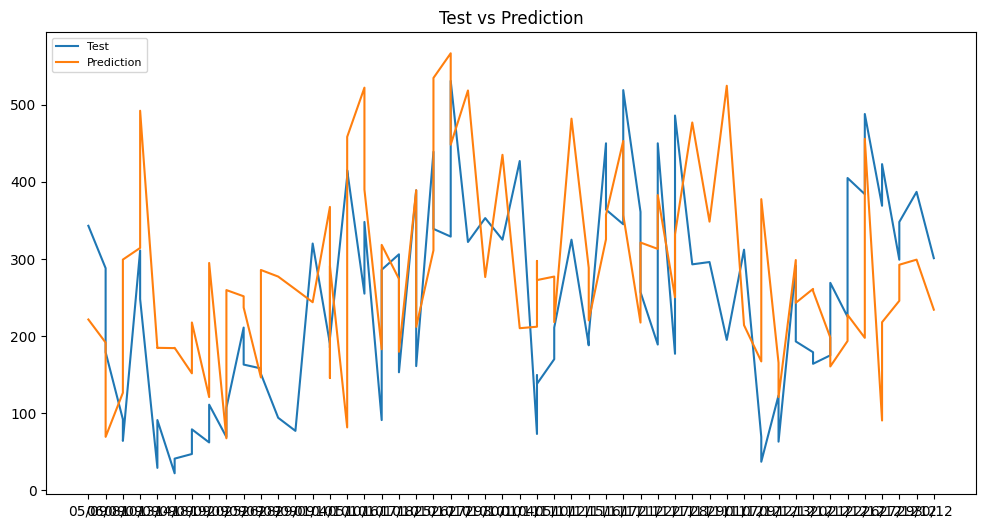

In [13]:
# random forest
from sklearn.ensemble import RandomForestRegressor

def random_forest(df, col):
    X = df.drop([col], axis=1)
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    model = RandomForestRegressor(n_estimators=100, max_depth=10)
    model.fit(X_train, y_train)
    print("Training Score: ", model.score(X_train, y_train))
    y_pred = model.predict(X_test)
    print("Testing Score: ", model.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))
    visualize_results(y_pred, y_test)
    
random_forest(df, 'RSPM/PM10')

                    SO2       NO2
Sampling Date                    
02/01          0.067939 -0.165248
02/01          0.067939  0.011147
03/01          3.369768  1.245913
03/01          2.758319  1.104797
05/01         -0.543511  0.505054 Sampling Date
02/01    0.368671
02/01   -0.528263
03/01    0.460483
03/01    0.326296
05/01   -0.252827
Name: RSPM/PM10, dtype: float64
Training Score:  0.8905575926039844
Testing Score:  -0.326670496836839
Mean Squared Error:  1.1366758023802177
R2 Score:  -0.326670496836839


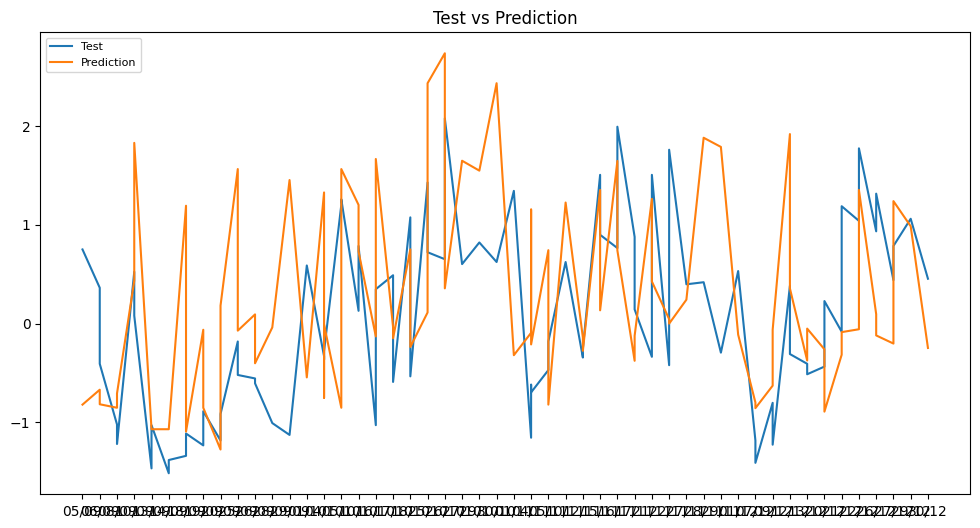

In [64]:
# XGBoost
import xgboost as xgb

def xgboost(df, col):
    df = df.drop(['Type of Location', 'Location of Monitoring Station'], axis=1)
    X = df.drop([col], axis=1)
    y = df[col]
    # normalize the data
    X = (X - X.mean()) / X.std()
    y = (y - y.mean()) / y.std()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    print(X_train[:5], y_train[:5])
    model = xgb.XGBRegressor(n_estimators=100, max_depth=10)
    model.fit(X_train, y_train)
    print("Training Score: ", model.score(X_train, y_train))
    y_pred = model.predict(X_test)
    print("Testing Score: ", model.score(X_test, y_test))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))
    visualize_results(y_pred, y_test)
    
xgboost(df, 'RSPM/PM10')

In [29]:
# LTC for RSPM/PM10
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from ncps import wirings
from ncps.tf import LTC
# early stopping
from tensorflow.keras.callbacks import EarlyStopping


def ncp_regressor(df, col):
    X = df.drop([col], axis=1)
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    print("Training Shape: {}, Testing Shape: {}".format(X_train.shape, X_test.shape))
    X_train = np.expand_dims(X_train,axis=0)
    y_train = np.expand_dims(y_train,axis=0)
    X_test = np.expand_dims(X_test,axis=0)
    y_test = np.expand_dims(y_test,axis=0)
    print("Training Shape: {}, Testing Shape: {}".format(X_train.shape, X_test.shape))
    
    wiring = wirings.AutoNCP(12,1)
    model = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=(None, X_train.shape[2])),
        LTC(wiring, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(1,))
    ])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=5)
    
    model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.1), metrics=['mse'])
    with tf.device('/gpu:0'):
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])
        
    y_pred = model.predict(X_test)
    # print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    # print("R2 Score: ", r2_score(y_test, y_pred))
    return model, history, y_pred, y_test

model, history, y_pred, y_test = ncp_regressor(df, 'RSPM/PM10')


Training Shape: (201, 4), Testing Shape: (87, 4)
Training Shape: (1, 201, 4), Testing Shape: (1, 87, 4)
Epoch 1/100


d:\anaconda\envs\GPT\lib\site-packages\tensorflow\python\data\ops\structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 8s 8s/step - loss: 75857.2266 - mse: 75857.2266 - val_loss: 75552.2188 - val_mse: 75552.2188
Epoch 2/100
1/1 [==============================] - 8s 8s/step - loss: 75286.5703 - mse: 75286.5703 - val_loss: 75142.3984 - val_mse: 75142.3984
Epoch 3/100
1/1 [==============================] - 8s 8s/step - loss: 74893.4062 - mse: 74893.4062 - val_loss: 74786.2656 - val_mse: 74786.2656
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 74551.4531 - mse: 74551.4531 - val_loss: 74399.7344 - val_mse: 74399.7344
Epoch 5/100
1/1 [==============================] - 8s 8s/step - loss: 74179.6094 - mse: 74179.6094 - val_loss: 73962.4531 - val_mse: 73962.4531
Epoch 6/100
1/1 [==============================] - 8s 8s/step - loss: 73758.7734 - mse: 73758.7734 - val_loss: 73470.8750 - val_mse: 73470.8750
Epoch 7/100
1/1 [==============================] - 8s 8s/step - loss: 73285.7422 - mse: 73285.7422 - val_loss: 72921.6250 - val_mse: 72921.6250
Epoc

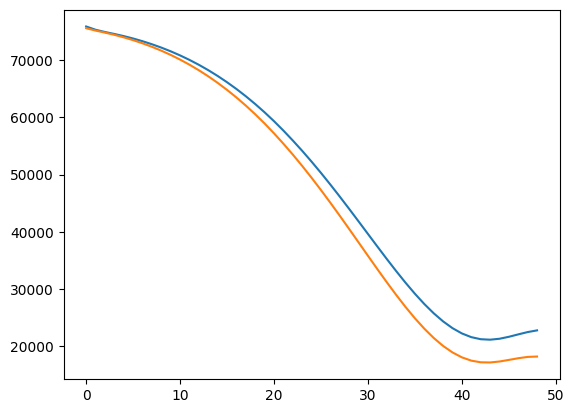

In [30]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

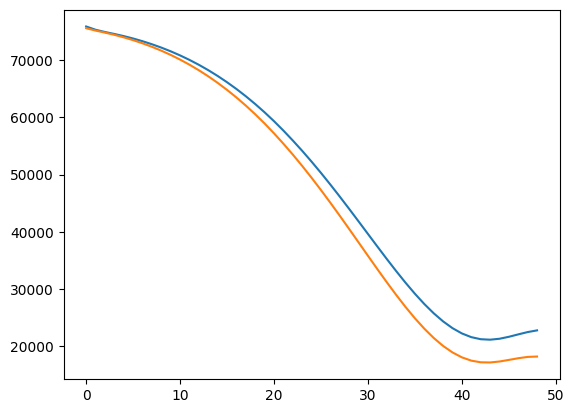

In [31]:
# plot the training and validation accuracy
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
    

(87, 1)
(1, 87)


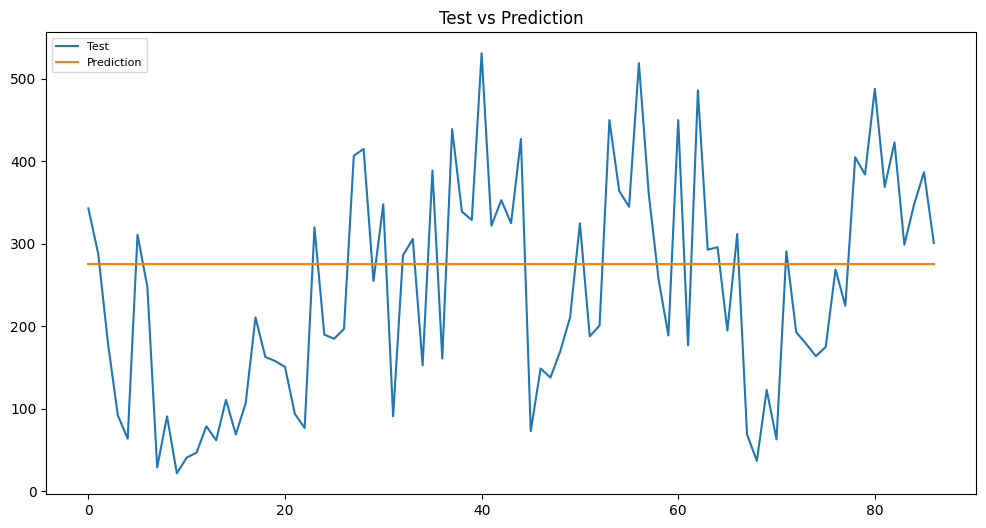

[[275.5317 ]
 [275.53168]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]
 [275.5317 ]

In [47]:

# plot the predictions vs actual values
# y_pred = np.squeeze(y_pred, axis=0)
# switch the axis of y_pred
# y_pred = np.swapaxes(y_pred, 0, 1)
print (y_pred.shape)
print (y_test.shape)
plt.figure(figsize=(12,6))
plt.plot(y_test[0], label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.title("Test vs Prediction")
plt.show()
print(y_pred, y_test[0])

## Plot data with respect to time

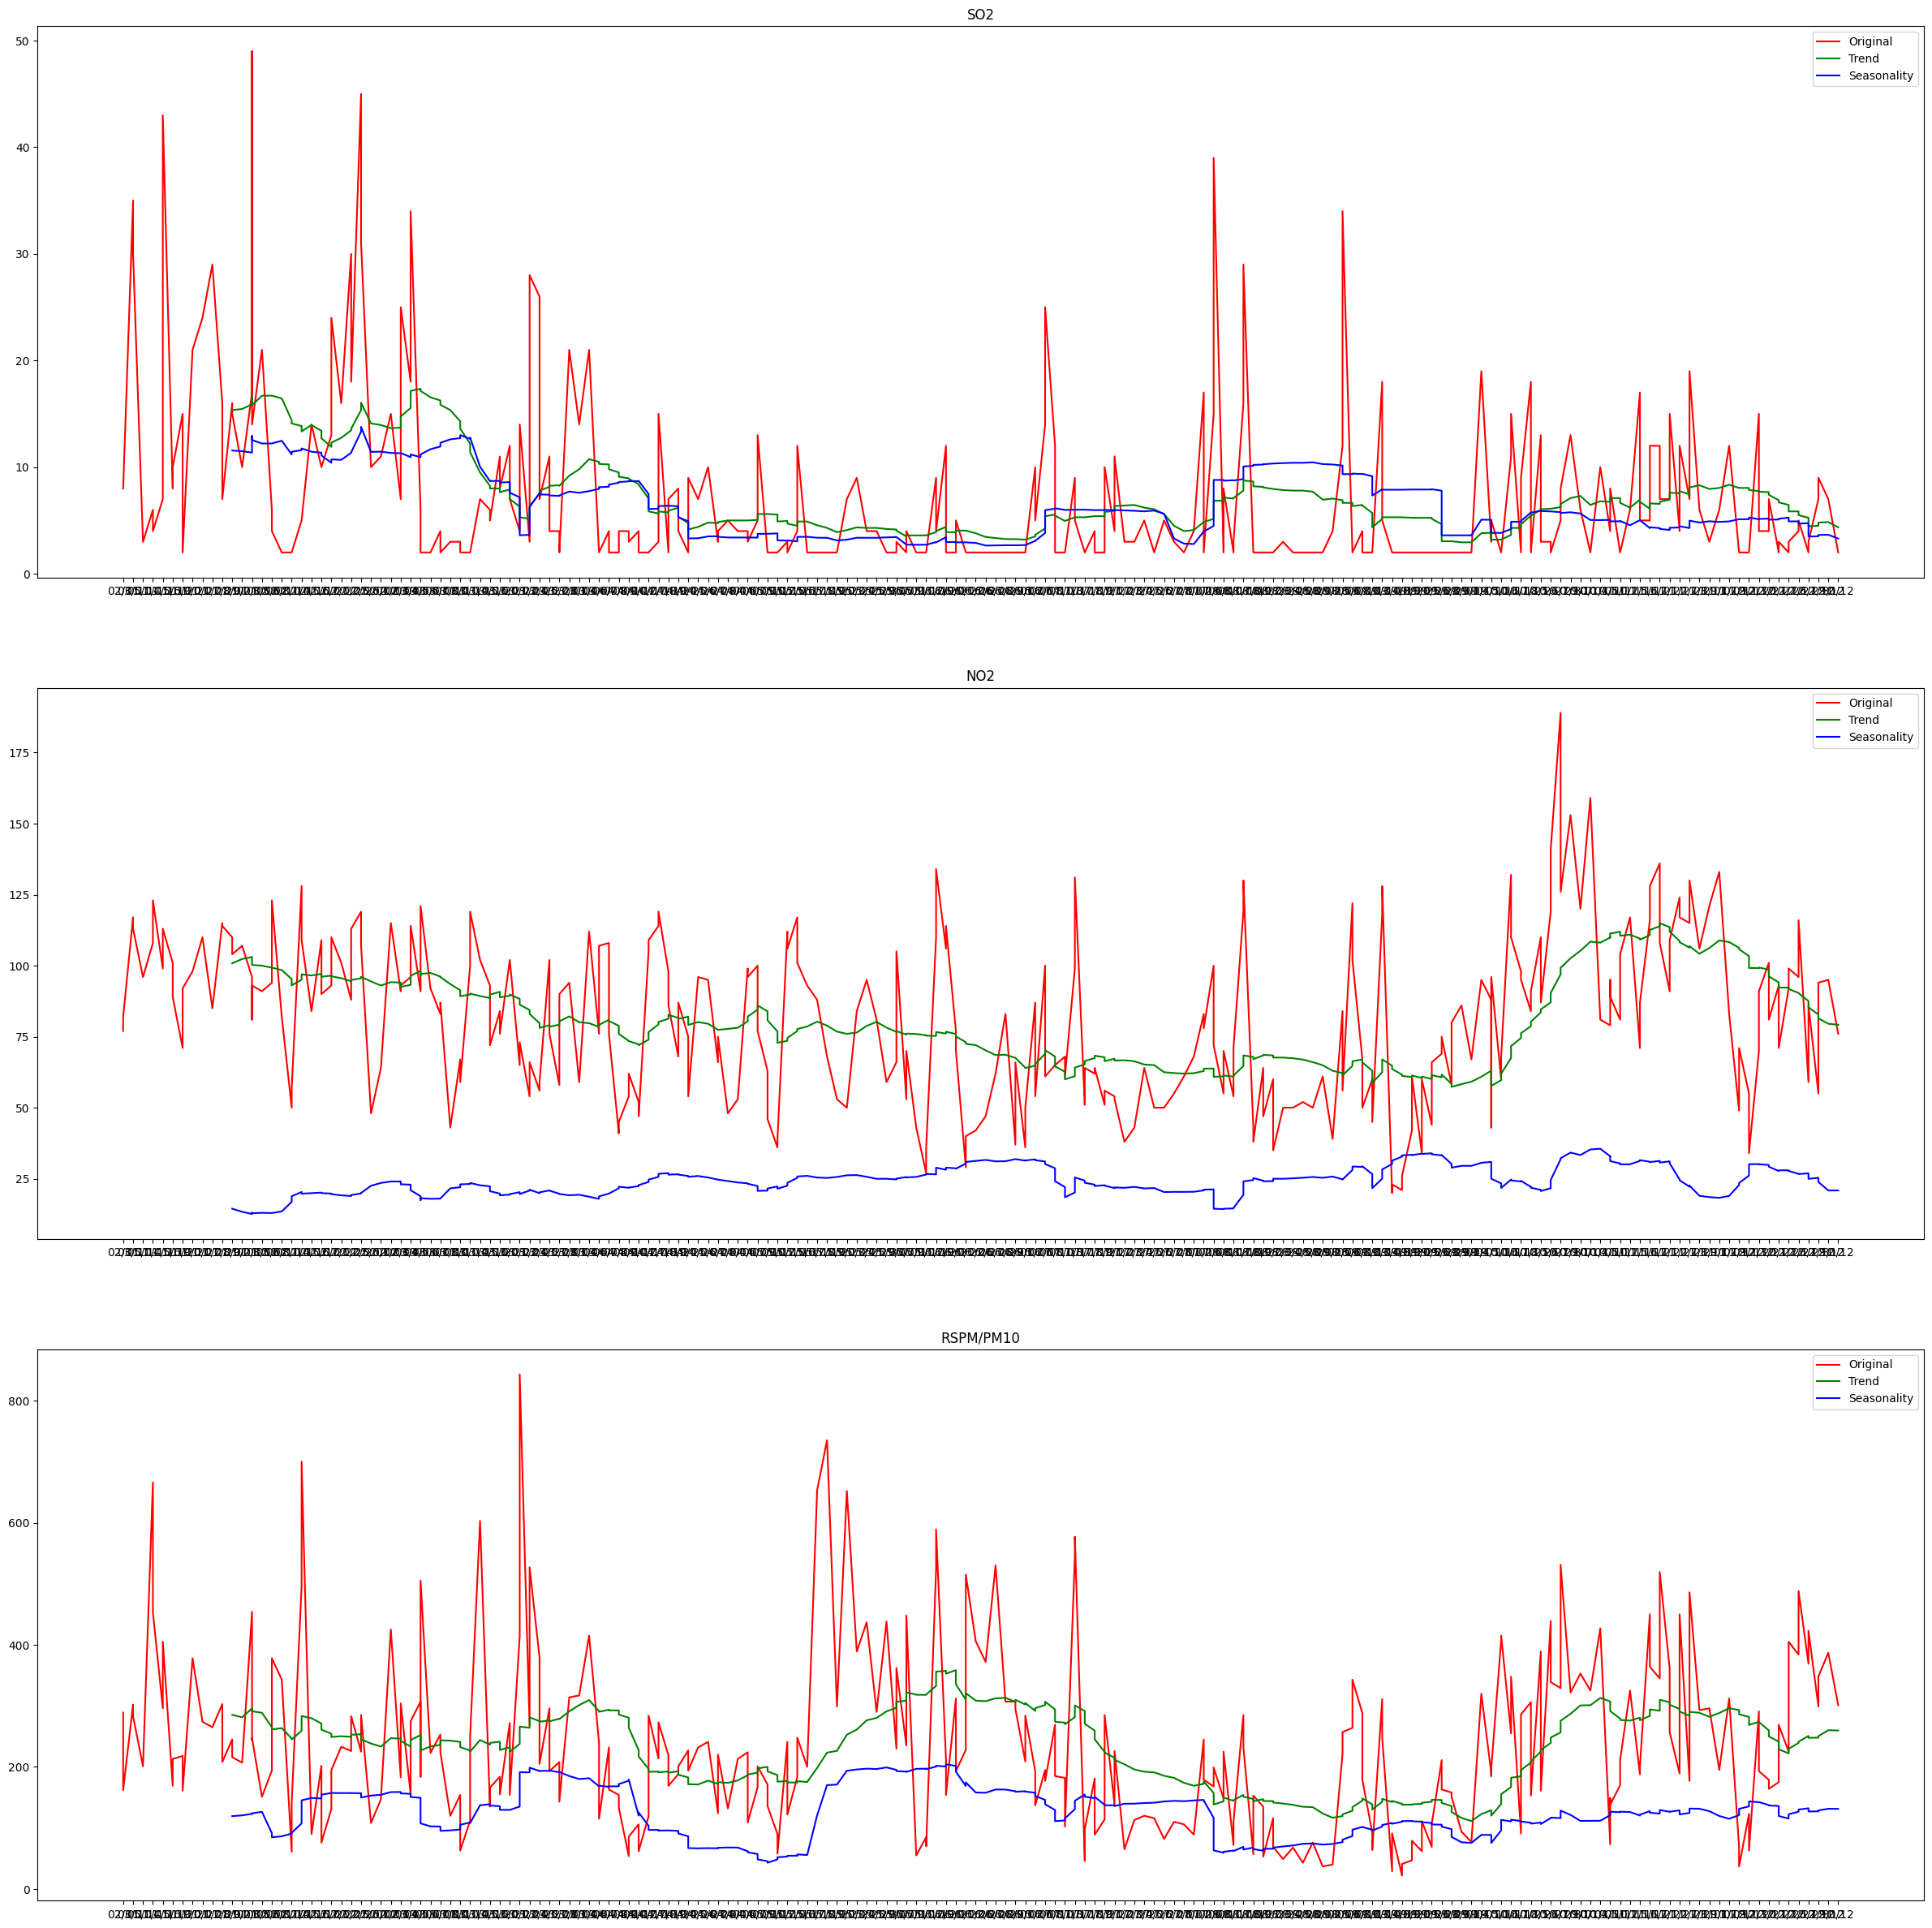

In [49]:
# plot a graph for the AQI of columns (SO2, NO2, RSPM/PM10,)
import matplotlib.pyplot as plt
import seaborn as sns

def ts_graph(df):
    figure, axes = plt.subplots(3, figsize=(30, 30))
    mean_roll = df.rolling(window=20).mean()
    std_roll = df.rolling(window=20).std()
    
    axes[0].plot(df["SO2"], color="red", label="Original")
    axes[0].plot(mean_roll["SO2"], color="green", label="Trend")
    axes[0].plot(std_roll["SO2"], color="blue", label="Seasonality")
    axes[0].set_title("SO2")
    axes[0].legend()
    
    axes[1].plot(df["NO2"], color="red", label="Original")  
    axes[1].plot(mean_roll["NO2"], color="green", label="Trend")
    axes[1].plot(std_roll["NO2"], color="blue", label="Seasonality")
    axes[1].set_title("NO2")
    axes[1].legend()
    
    axes[2].plot(df["RSPM/PM10"], color="red", label="Original")
    axes[2].plot(mean_roll["RSPM/PM10"], color="green", label="Trend")
    axes[2].plot(std_roll["RSPM/PM10"], color="blue", label="Seasonality")
    axes[2].set_title("RSPM/PM10")
    axes[2].legend()
    
ts_graph(df)

## ADF (Augmented Dickey-Fuller) test 
## P-value should be less than 0.05 for the data to be stationary

In [50]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def adf_test(df):
    for col in df.columns:
        result = adfuller(df[col])
        print("ADF Statistic for ", col, ": ", result[0])
        print("p-value for ", col, ": ", result[1])
        print("Critical Values for ", col, ": ")
        for key, value in result[4].items():
            print("\t", key, ": ", value)
        print("\n")
        
adf_test(df)

ADF Statistic for  Location of Monitoring Station :  -17.51210977551184
p-value for  Location of Monitoring Station :  4.329513542189225e-30
Critical Values for  Location of Monitoring Station : 
	 1% :  -3.453342167806272
	 5% :  -2.871663828287282
	 10% :  -2.572164381381345


ADF Statistic for  Type of Location :  -6.232745764694106
p-value for  Type of Location :  4.908130523266599e-08
Critical Values for  Type of Location : 
	 1% :  -3.4538376962008495
	 5% :  -2.8718811911083093
	 10% :  -2.5722803076202174


ADF Statistic for  SO2 :  -3.6651605025846683
p-value for  SO2 :  0.004630763202433703
Critical Values for  SO2 : 
	 1% :  -3.4546223782586534
	 5% :  -2.8722253212300277
	 10% :  -2.5724638500216264


ADF Statistic for  NO2 :  -9.00516078569272
p-value for  NO2 :  6.3407313927501045e-15
Critical Values for  NO2 : 
	 1% :  -3.453342167806272
	 5% :  -2.871663828287282
	 10% :  -2.572164381381345


ADF Statistic for  RSPM/PM10 :  -6.351190143378655
p-value for  RSPM/PM10 :  2

In [52]:
rolling_mean_df = df.rolling(window=5).mean()
rolling_mean_df.dropna(inplace=True)
adf_test(rolling_mean_df)

ADF Statistic for  Location of Monitoring Station :  -3.4234418093956807
p-value for  Location of Monitoring Station :  0.010185231917850637
Critical Values for  Location of Monitoring Station : 
	 1% :  -3.454988209954765
	 5% :  -2.8723857312734613
	 10% :  -2.572549407997327


ADF Statistic for  Type of Location :  -3.2975363914747104
p-value for  Type of Location :  0.014988957658119492
Critical Values for  Type of Location : 
	 1% :  -3.454988209954765
	 5% :  -2.8723857312734613
	 10% :  -2.572549407997327


ADF Statistic for  SO2 :  -2.7531017067169037
p-value for  SO2 :  0.06529140093036824
Critical Values for  SO2 : 
	 1% :  -3.4550813975770827
	 5% :  -2.8724265892710914
	 10% :  -2.5725712007462582


ADF Statistic for  NO2 :  -2.0481065868115795
p-value for  NO2 :  0.2658862089642045
Critical Values for  NO2 : 
	 1% :  -3.4550813975770827
	 5% :  -2.8724265892710914
	 10% :  -2.5725712007462582


ADF Statistic for  RSPM/PM10 :  -2.3171095043921204
p-value for  RSPM/PM10 :  0

<Axes: title={'center': 'Rolling Mean'}, xlabel='Sampling Date'>

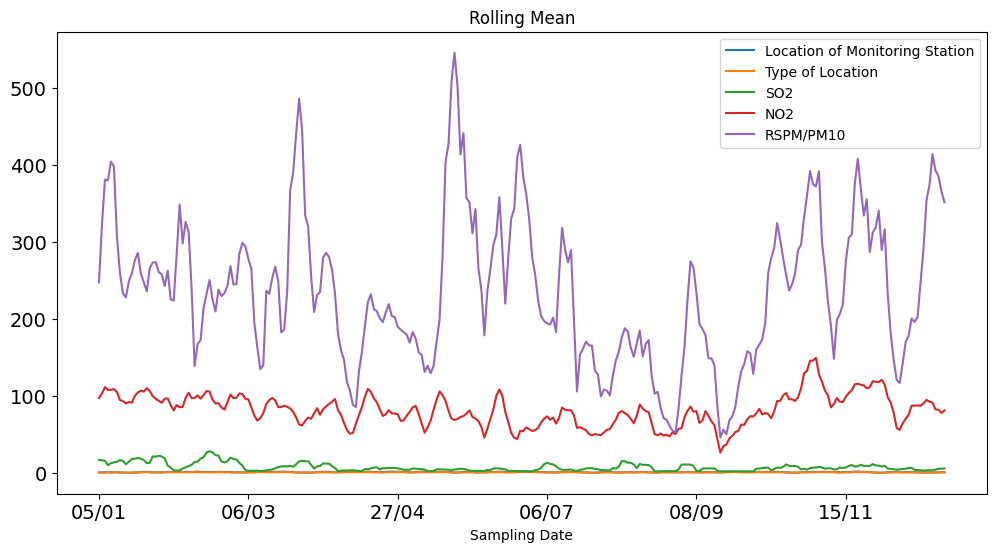

In [53]:
rolling_mean_df.plot(figsize=(12,6), title="Rolling Mean", fontsize=14)

In [54]:
rolling_std_df = df.rolling(window=30).std()
rolling_std_df.dropna(inplace=True) 
adf_test(rolling_std_df)

ADF Statistic for  Location of Monitoring Station :  -4.6395429784020426
p-value for  Location of Monitoring Station :  0.00010914330706480225
Critical Values for  Location of Monitoring Station : 
	 1% :  -3.4560535712549925
	 5% :  -2.8728527662442334
	 10% :  -2.5727985212493754


ADF Statistic for  Type of Location :  -1.8581012611608907
p-value for  Type of Location :  0.3520208574530865
Critical Values for  Type of Location : 
	 1% :  -3.456780859712
	 5% :  -2.8731715065600003
	 10% :  -2.572968544


ADF Statistic for  SO2 :  -1.9560479636939168
p-value for  SO2 :  0.30617059517453504
Critical Values for  SO2 : 
	 1% :  -3.455952927706342
	 5% :  -2.8728086526320302
	 10% :  -2.572774990685656


ADF Statistic for  NO2 :  -2.506341375735677
p-value for  NO2 :  0.11393901385622973
Critical Values for  NO2 : 
	 1% :  -3.4561550092339512
	 5% :  -2.8728972266578676
	 10% :  -2.5728222369384763


ADF Statistic for  RSPM/PM10 :  -2.7138834865015613
p-value for  RSPM/PM10 :  0.07166647

<Axes: title={'center': 'Rolling Standard Deviation'}, xlabel='Sampling Date'>

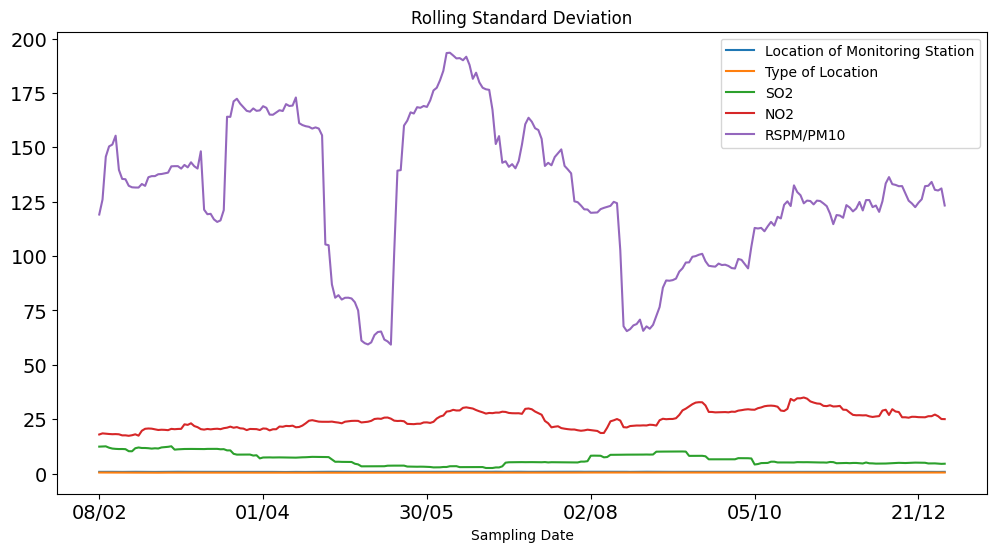

In [55]:
rolling_std_df.plot(figsize=(12,6), title="Rolling Standard Deviation", fontsize=14)
    

Training Score:  0.10753104419748138
Testing Score:  0.5239833687542769
Mean Squared Error:  4470.61039783549
R2 Score:  0.5239833687542769


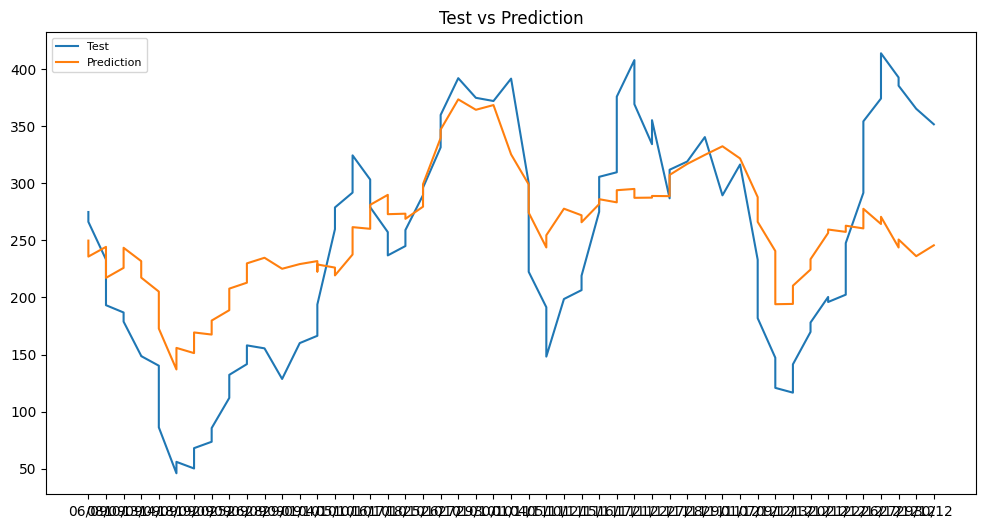

Training Score:  0.868432877274221
Testing Score:  0.2564025209720695
Mean Squared Error:  6983.652257793655
R2 Score:  0.2564025209720695


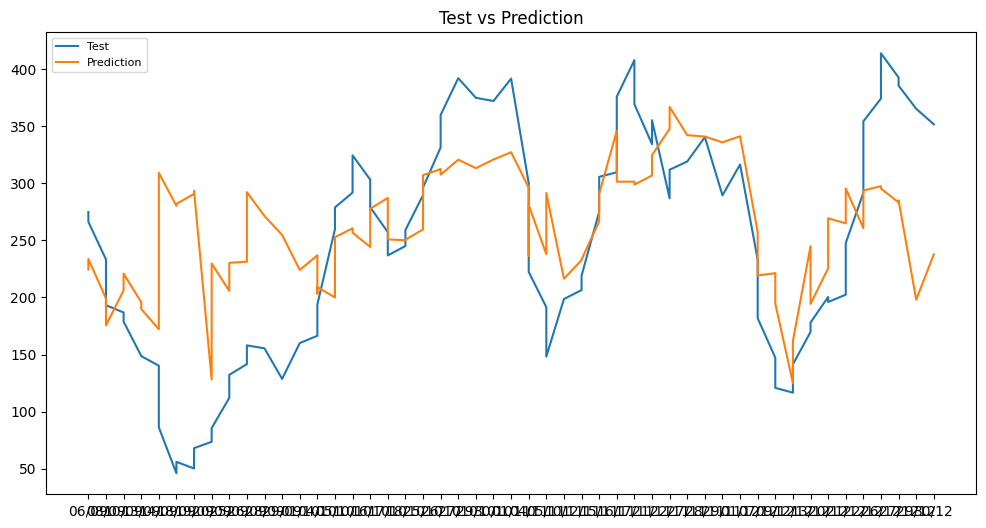

In [56]:
# apply a model to the rolling mean and rolling standard deviation
linear_reg(rolling_mean_df, 'RSPM/PM10')
random_forest(rolling_mean_df, 'RSPM/PM10')

# bhai ye kya hora hai yahan mardo mujhe koi taki ye sab na dekhna pade firse

Train Accuracy:  0.2735758845359638
Test Accuracy:  0.3572619946304042


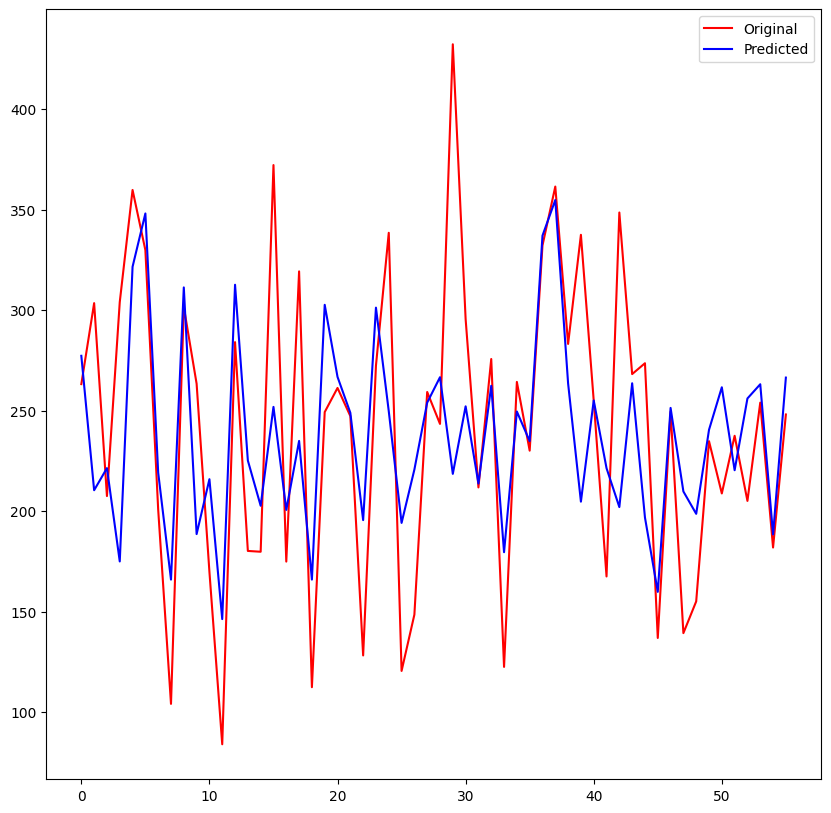

Train Accuracy:  0.8839727079879819
Test Accuracy:  0.5350023264879251


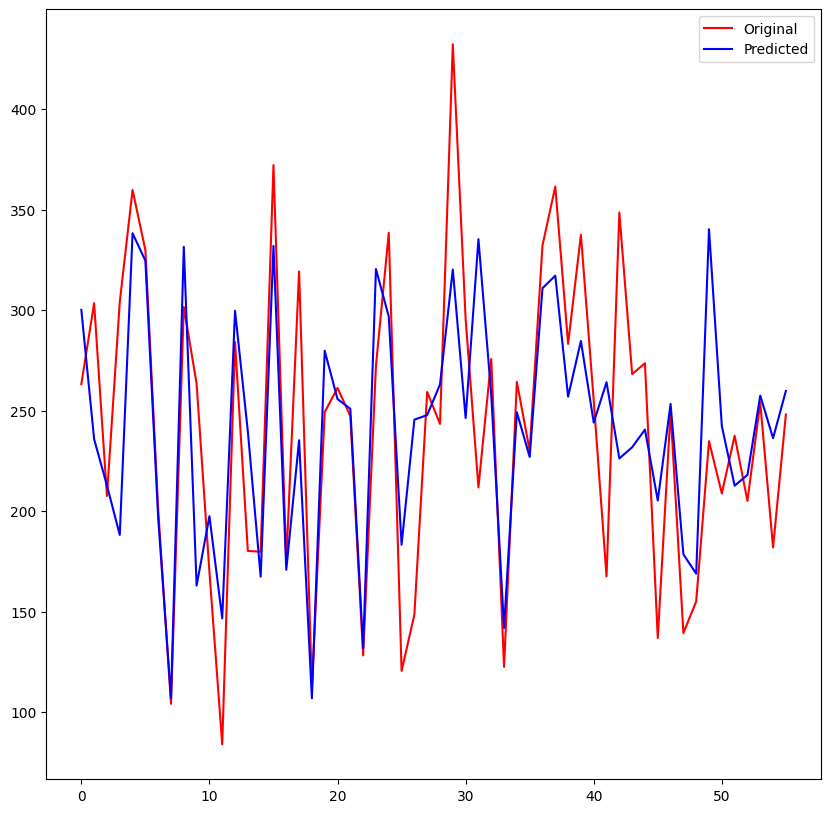

Train Accuracy:  1.0
Test Accuracy:  0.15134566548900497


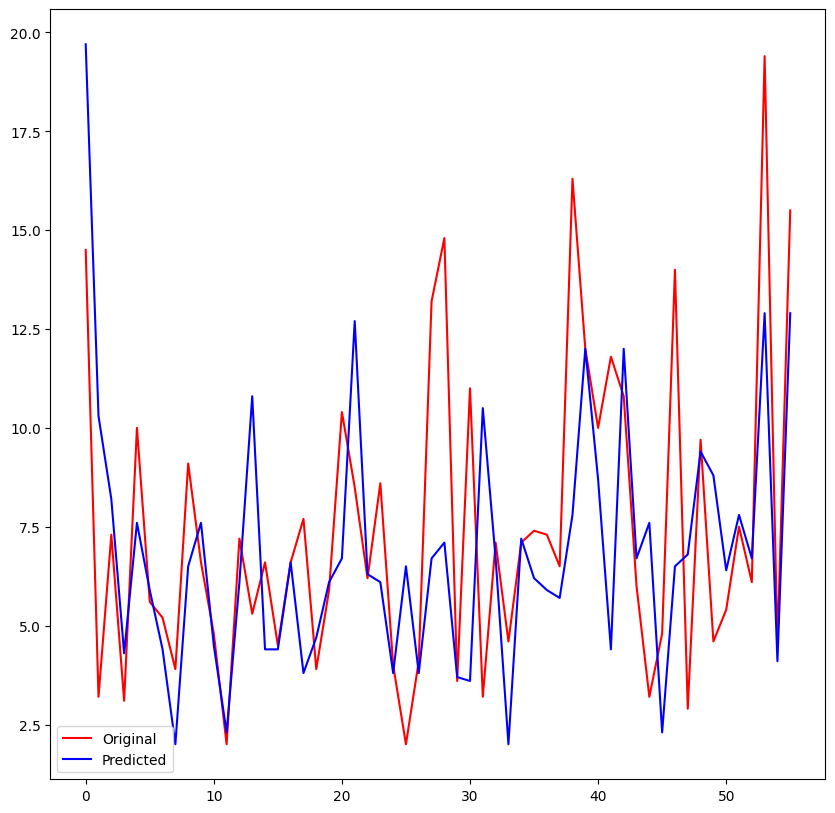

In [59]:
# linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
    
def linear_reg(df):
    X = df.drop(["RSPM/PM10", "Location of Monitoring Station", "Type of Location"], axis=1)
    y = df["RSPM/PM10"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print("Train Accuracy: ", lr.score(X_train, y_train))
    print("Test Accuracy: ", lr.score(X_test, y_test))
    
    # plot the test and predicted values
    y_pred = lr.predict(X_test)
    plt.figure(figsize=(10, 10))
    # plot a line for the original values in red color
    plt.plot(y_test.values, color="red", label="Original")
    # plot a line for the predicted values in blue color
    plt.plot(y_pred, color="blue", label="Predicted")
    plt.legend()
    plt.show()
    
from sklearn.ensemble import RandomForestRegressor
def random_forest_reg(df):
    X = df.drop(["RSPM/PM10", "Location of Monitoring Station", "Type of Location"], axis=1)
    y = df["RSPM/PM10"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    print("Train Accuracy: ", rfr.score(X_train, y_train))
    print("Test Accuracy: ", rfr.score(X_test, y_test))
    
    # plot the test and predicted values
    y_pred = rfr.predict(X_test)
    plt.figure(figsize=(10, 10))
    # plot a line for the original values in red color
    plt.plot(y_test.values, color="red", label="Original")
    # plot a line for the predicted values in blue color
    plt.plot(y_pred, color="blue", label="Predicted")
    plt.legend()
    plt.show()
    
from sklearn.tree import DecisionTreeRegressor
def decision_tree_reg(df):
    X = df.drop(["RSPM/PM10", "Location of Monitoring Station", "Type of Location"], axis=1)
    y = df["RSPM/PM10"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    print("Train Accuracy: ", dtr.score(X_train, y_train))
    print("Test Accuracy: ", dtr.score(X_test, y_test))
    
    # plot the test and predicted values
    y_pred = dtr.predict(X_test)
    plt.figure(figsize=(10, 10))
    # plot a line for the original values in red color
    plt.plot(y_test.values, color="red", label="Original")
    # plot a line for the predicted values in blue color
    plt.plot(y_pred, color="blue", label="Predicted")
    plt.legend()
    plt.show()
    
rolling_mean_df = df.rolling(window=10).mean()
rolling_mean_df.dropna(inplace=True)
linear_reg(rolling_mean_df)
random_forest_reg(rolling_mean_df)
decision_tree_reg(rolling_mean_df)
    

In [36]:
from ncps.wirings import AutoNCP
import numpy as np
import torch.nn as nn
from ncps.wirings import AutoNCP
from ncps.torch import LTC
import pytorch_lightning as pl
import torch
import torch.utils.data as data

class TimeSeriesLearner(pl.LightningModule):
    def __init__(self, model, lr=0.005):
        super().__init__()
        self.model = model
        self.lr = lr

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat, _ = self.model.forward(x)
        y_hat = y_hat.view_as(y)
        loss = nn.MSELoss()(y_hat, y)
        self.log("train_loss", loss, prog_bar=True)
        return {"loss": loss}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat, _ = self.model.forward(x)
        y_hat = y_hat.view_as(y)
        loss = nn.MSELoss()(y_hat, y)

        self.log("val_loss", loss, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        # Here we just reuse the validation_step for testing
        return self.validation_step(batch, batch_idx)

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)
    
in_features = 2
out_features = 1

wiring = AutoNCP(16, out_features)  # Adjust the number of units and motor neurons as needed
ltc_model = LTC(in_features, wiring, batch_first=True)

# Creating a PyTorch Lightning Learner
time_series_learner = TimeSeriesLearner(ltc_model, lr=0.01)
trainer = pl.Trainer(
    logger=pl.loggers.CSVLogger("log"),
    max_epochs=400,
    gradient_clip_val=1,  # Clip gradient to stabilize training
)

delhi_2012 = df.drop(["Location of Monitoring Station", "Type of Location"], axis=1)

X = delhi_2012.drop(["RSPM/PM10"], axis=1)
y = delhi_2012["RSPM/PM10"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# dtype expected Float
train_dataset = data.TensorDataset(torch.from_numpy(X_train.values).float(), torch.from_numpy(y_train.values).float())
test_dataset = data.TensorDataset(torch.from_numpy(X_test.values).float(), torch.from_numpy(y_test.values).float())
trainer.fit(time_series_learner, train_dataloaders=data.DataLoader(train_dataset, batch_size=64,))



alloc!


GPU available: True (cuda), used: True
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
d:\anaconda\envs\GPT\lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params
-------------------------------
0 | model | LTC  | 1.5 K 
-------------------------------
1.2 K     Trainable params
288       Non-trainable params
1.5 K     Total params
0.006     Total estimated model params size (MB)

  | Name  | Type | Params
-------------------------------
0 | model | LTC  | 1.5 K 
-------------------------------
1.2 K     Trainable params
288       Non-trainable params
1.5 K     Tot

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.
`Trainer.fit` stopped: `max_epochs=400` reached.


In [37]:
trainer.test(time_series_learner, dataloaders=data.DataLoader(test_dataset, batch_size=32))

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
d:\anaconda\envs\GPT\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss              19745.146484375
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val_loss': 19745.146484375}]

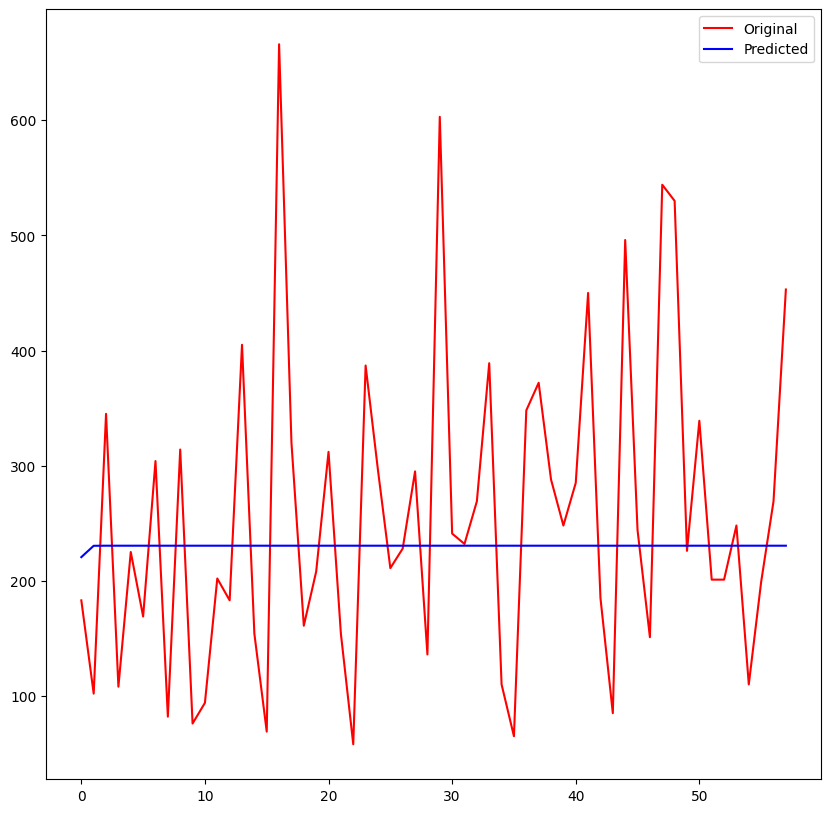

In [39]:
# plot the test and predicted values
y_pred = ltc_model(torch.tensor(X_test.values).float())[0].detach().numpy()
plt.figure(figsize=(10, 10))
# plot a line for the original values in red color
plt.plot(y_test.values, color="red", label="Original")
# plot a line for the predicted values in blue color
plt.plot(y_pred, color="blue", label="Predicted")
plt.legend()
plt.show()
    

In [111]:
ndf = pd.read_csv("EIA_puerto_rico_electric_consumption.csv", index_col=1)
ndf.head()

,Unnamed: 0,yearmonth,residential,commercial,industrial,all_sectors
date,,,,,,
2016-01-01,0,201601,515,648,158,1321
2016-02-01,1,201602,447,647,176,1270
2016-03-01,2,201603,499,738,208,1445
2016-04-01,3,201604,506,665,176,1346
2016-05-01,4,201605,556,746,202,1504


In [112]:
# dataset exploration
print("Dataset Shape: ", ndf.shape, "\n")
print("Dataset Size: ", ndf.size, "\n")
print("Dataset Columns: ", ndf.columns, "\n")
print("Dataset Index: ", ndf.index, "\n")
print("Dataset Datatypes: ", ndf.dtypes, "\n")
print("Dataset Memory Usage: ", ndf.memory_usage(), "\n")
print("Dataset Description: ", ndf.describe(), "\n")

Dataset Shape:  (48, 6) 

Dataset Size:  288 

Dataset Columns:  Index(['Unnamed: 0', 'yearmonth', 'residential', 'commercial', 'industrial',
       'all_sectors'],
      dtype='object') 

Dataset Index:  Index(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
       '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
       '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
       '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
       '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
       '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
       '2019-10-01', '2019-11-01', '2019-12-01'],
      dtype='object', name='date') 

Dataset Datatyp

In [113]:
print("Unique values in each column: \n")
for col in ndf.columns:
    print(col, " : ", ndf[col].nunique())
    
print("\nNull values in each column: \n")
print(ndf.isnull().sum())

Unique values in each column: 

Unnamed: 0  :  48
yearmonth  :  48
residential  :  43
commercial  :  42
industrial  :  36
all_sectors  :  45

Null values in each column: 

Unnamed: 0     0
yearmonth      0
residential    0
commercial     0
industrial     0
all_sectors    0
dtype: int64


In [114]:
# drop the yearmonth and Unnamed: 0
ndf = ndf.drop(['yearmonth', 'Unnamed: 0'], axis=1)

Training Score:  0.9999957980344049
Testing Score:  0.9999866400443705


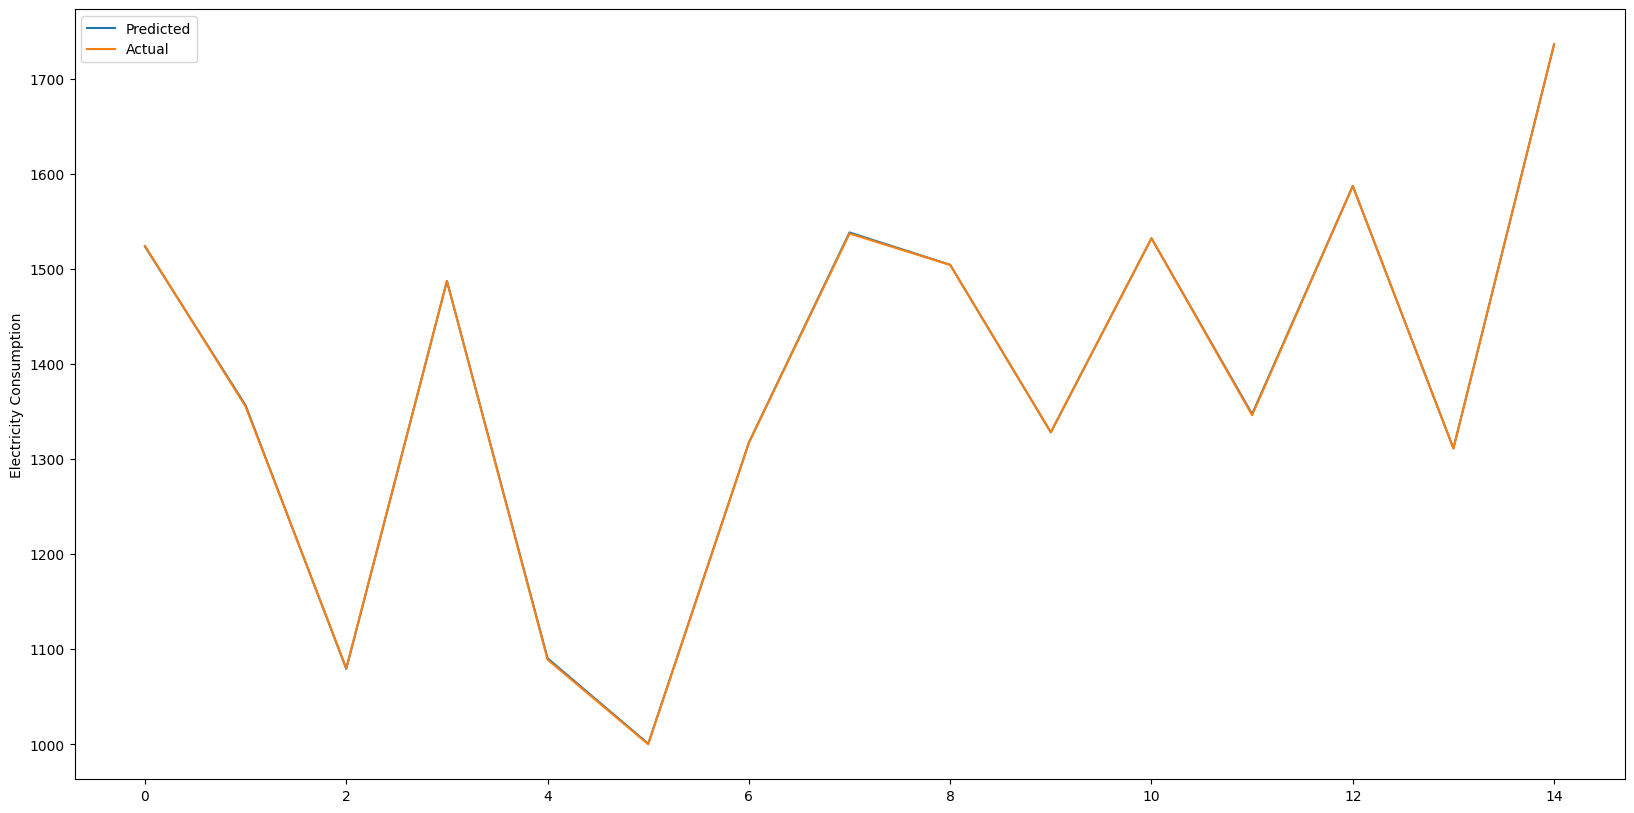

In [125]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = ndf.drop(['all_sectors'], axis=1)
y = ndf['all_sectors']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training Score: ", lr.score(X_train, y_train))
print("Testing Score: ", lr.score(X_test, y_test))

def visulize_data(df, lr):
    # plot the actual and predicted values on top of each other
    y_pred = lr.predict(X_test)
    plt.figure(figsize=(20, 10))
    plt.plot(y_pred, label="Predicted")
    plt.plot(y_test.values, label="Actual")
    plt.ylabel("Electricity Consumption")
    plt.legend()
    plt.show()

visulize_data(ndf, lr)
    

Training Score:  0.9999828129848325
Testing Score:  0.9999405643278492


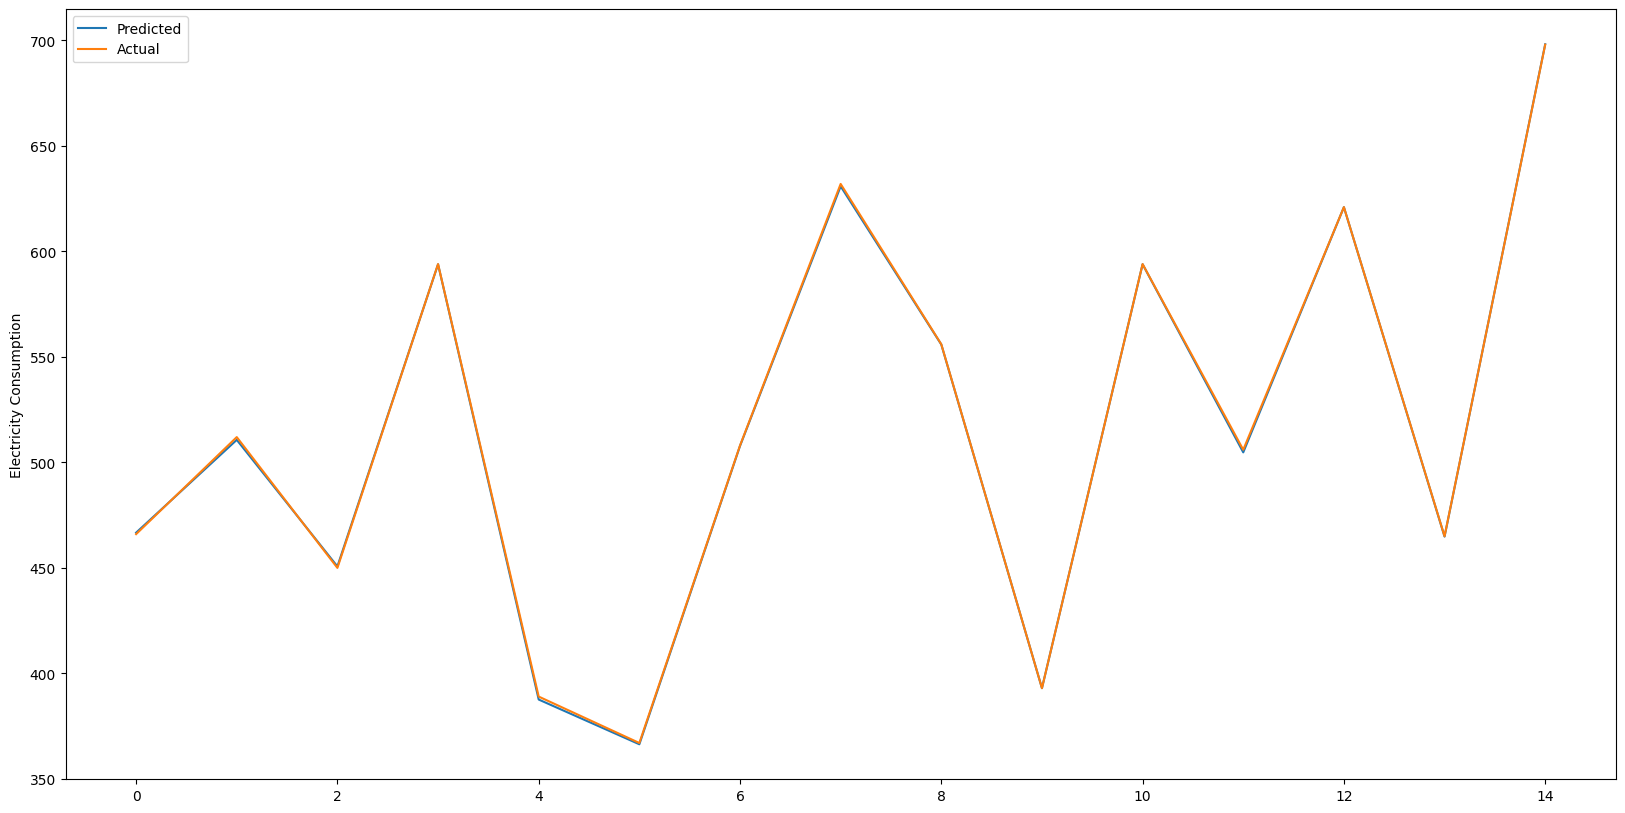

In [126]:
X = ndf.drop(['residential'], axis=1)
y = ndf['residential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training Score: ", lr.score(X_train, y_train))
print("Testing Score: ", lr.score(X_test, y_test))

def visulize_data(df, lr):
    # plot the actual and predicted values on top of each other
    y_pred = lr.predict(X_test)
    plt.figure(figsize=(20, 10))
    plt.plot(y_pred, label="Predicted")
    plt.plot(y_test.values, label="Actual")
    plt.ylabel("Electricity Consumption")
    plt.legend()
    plt.show()

visulize_data(ndf, lr)

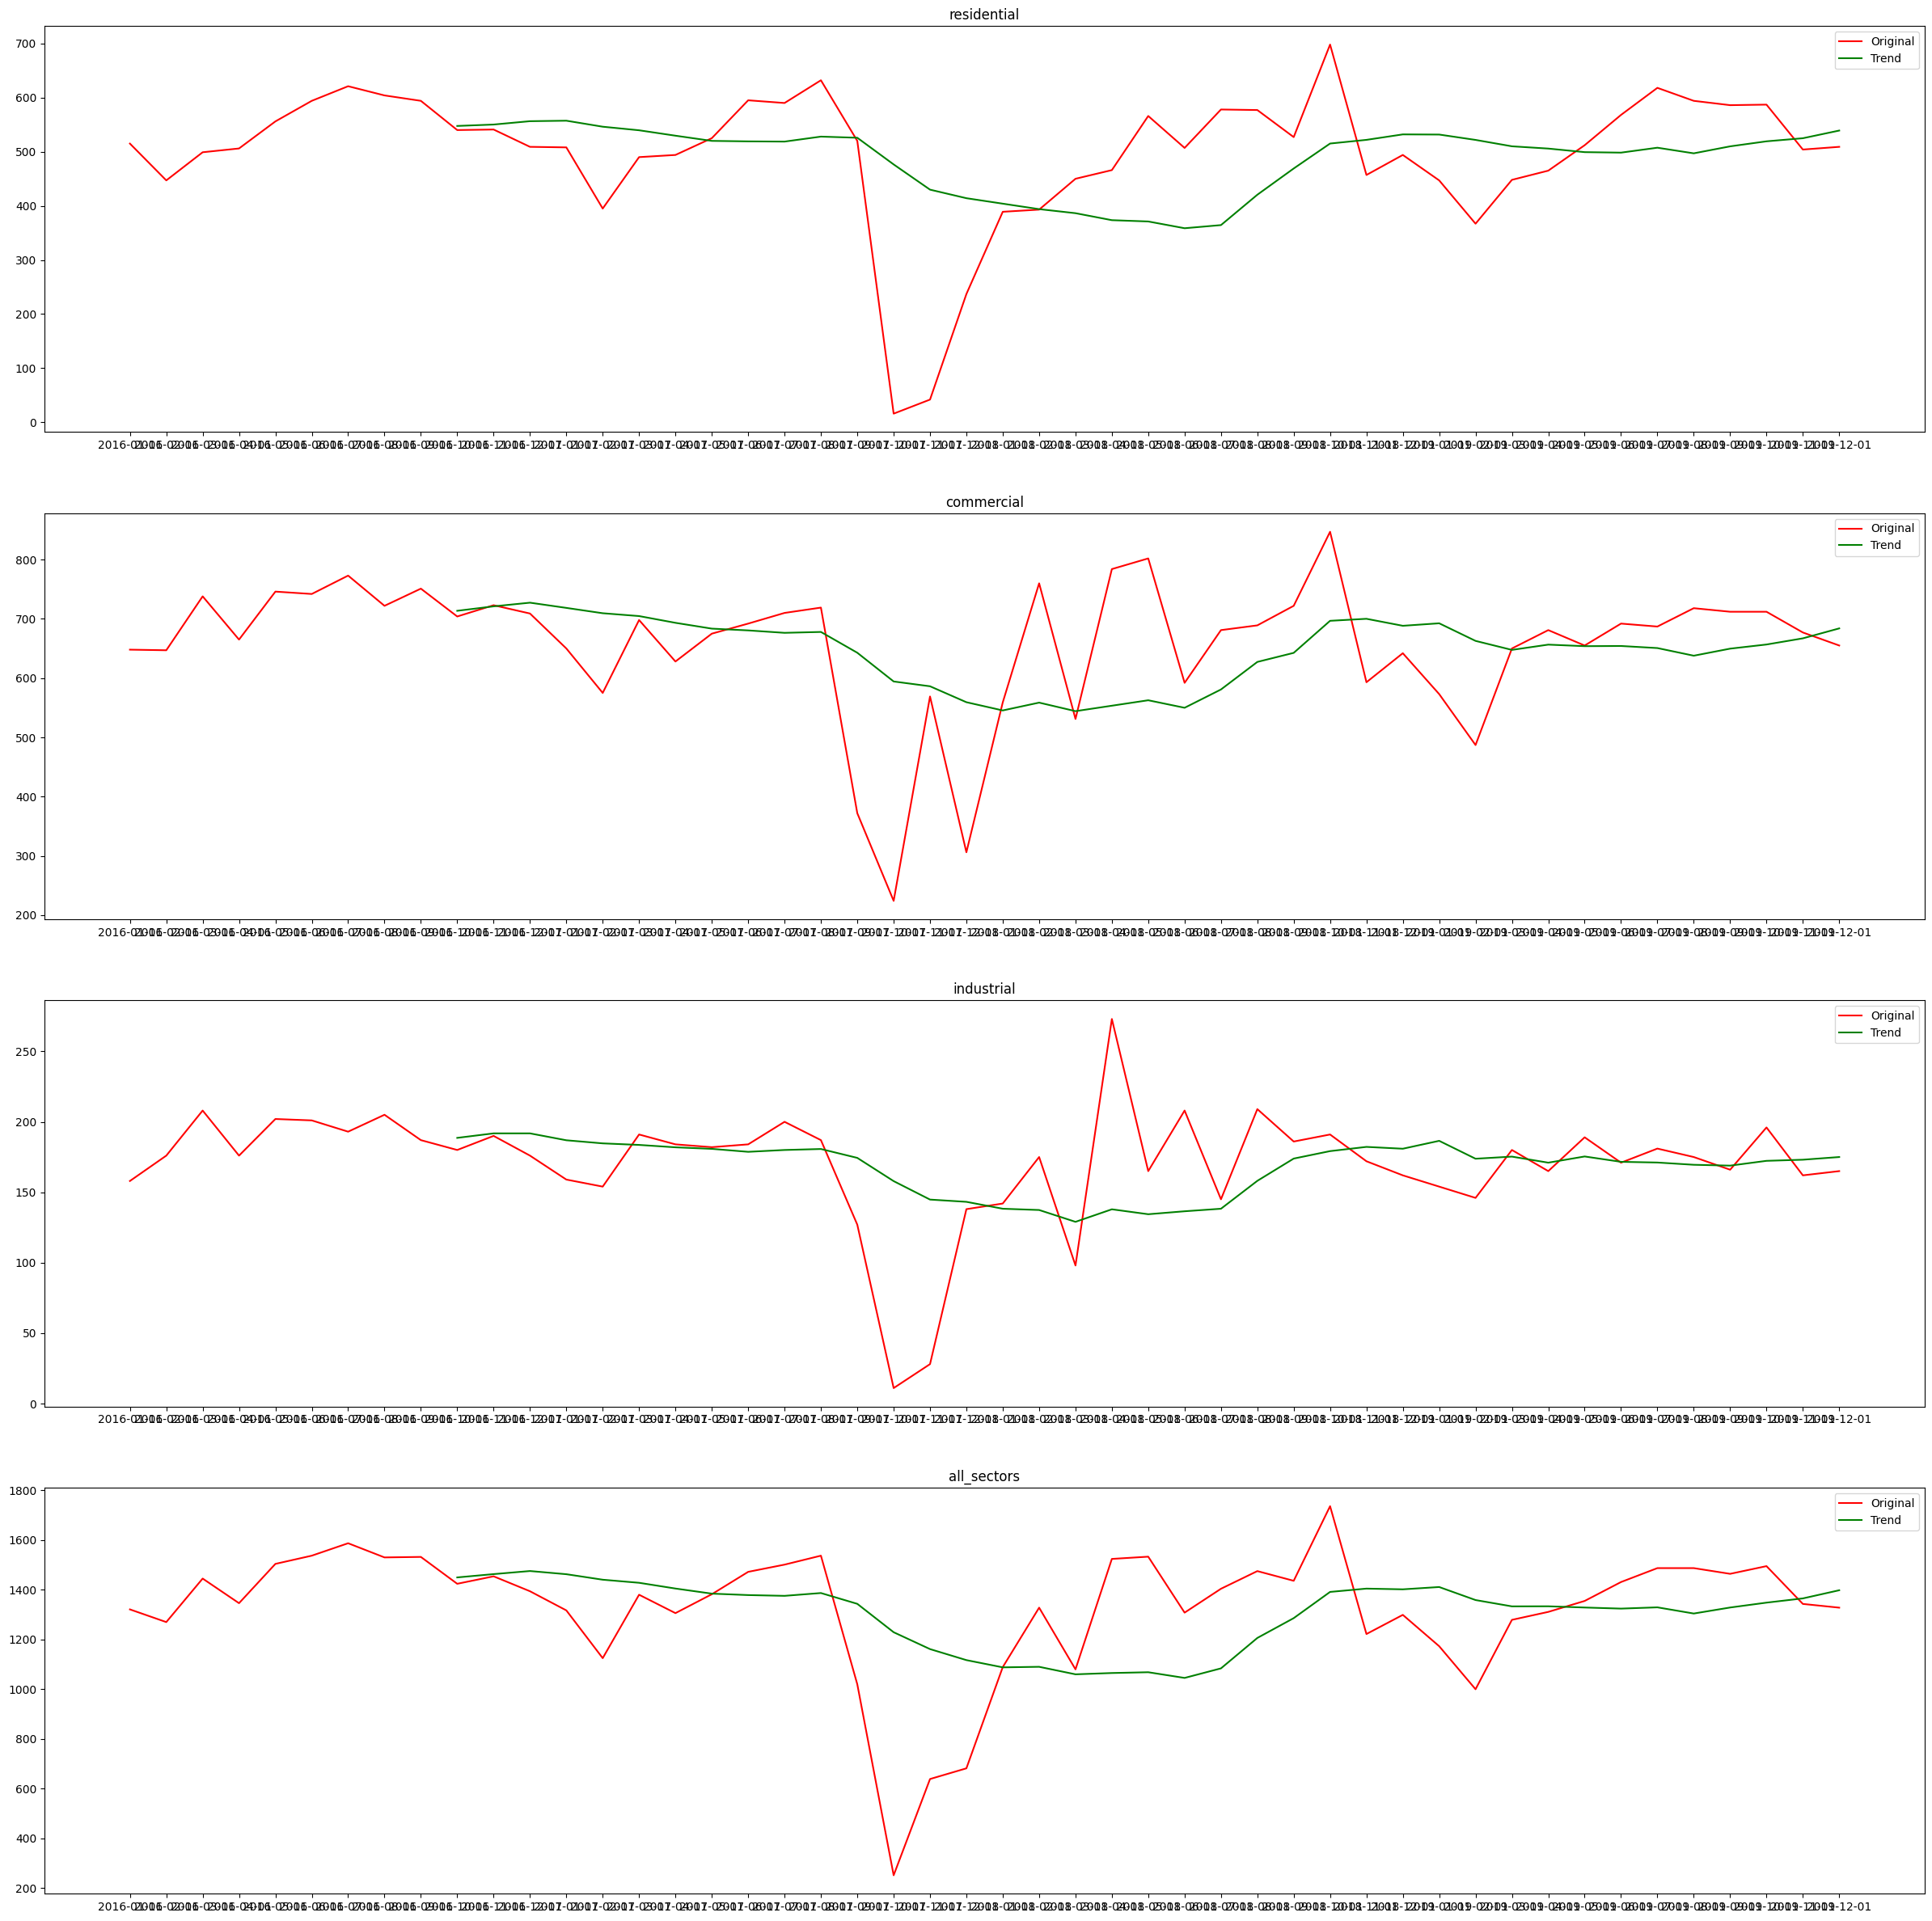

In [ ]:
# plot a graph for each column (residential, commercial, industrial, all_sectors)
import matplotlib.pyplot as plt
import seaborn as sns


def ts_graph(df):
    figure, axes = plt.subplots(4, figsize=(30, 30))
    mean_roll = df.rolling(window=10).mean()
    # std_roll = df.rolling(window=10).std()
    
    axes[0].plot(df["residential"], color="red", label="Original")
    axes[0].plot(mean_roll["residential"], color="green", label="Trend")
    # axes[0].plot(std_roll["residential"], color="blue", label="Seasonality")
    axes[0].set_title("residential")
    axes[0].legend()
    
    axes[1].plot(df["commercial"], color="red", label="Original")  
    axes[1].plot(mean_roll["commercial"], color="green", label="Trend")
    # axes[1].plot(std_roll["commercial"], color="blue", label="Seasonality")
    axes[1].set_title("commercial")
    axes[1].legend()
    
    axes[2].plot(df["industrial"], color="red", label="Original")
    axes[2].plot(mean_roll["industrial"], color="green", label="Trend")
    # axes[2].plot(std_roll["industrial"], color="blue", label="Seasonality")
    axes[2].set_title("industrial")
    axes[2].legend()
    
    axes[3].plot(df["all_sectors"], color="red", label="Original")
    axes[3].plot(mean_roll["all_sectors"], color="green", label="Trend")
    # axes[3].plot(std_roll["all_sectors"], color="blue", label="Seasonality")
    axes[3].set_title("all_sectors")
    axes[3].legend()
    
ts_graph(ndf)


In [ ]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def adf_test(df):
    dftest = adfuller(df, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("\n")
        
adf_test(ndf["residential"])
adf_test(ndf["commercial"])
adf_test(ndf["industrial"])
adf_test(ndf["all_sectors"])

1. ADF :  -3.030707275931341
2. P-Value :  0.032124544844721006
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47


1. ADF :  -3.641043150182892
2. P-Value :  0.005023147302887891
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 44


1. ADF :  -2.344520573099449
2. P-Value :  0.15801080227580216
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 41


1. ADF :  -3.1276074883239846
2. P-Value :  0.024576432639606103
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47




In [ ]:
log_ndf = np.log(ndf)
# delete the columns (yearmonth, Unnamed: 0)
log_ndf = log_ndf.drop(['yearmonth', 'Unnamed: 0'], axis=1)
log_ndf.head()

d:\anaconda\envs\GPT\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,residential,commercial,industrial,all_sectors
date,,,,
2016-01-01,6.244167,6.473891,5.062595,7.186144
2016-02-01,6.102559,6.472346,5.170484,7.146772
2016-03-01,6.212606,6.603944,5.337538,7.275865
2016-04-01,6.226537,6.499787,5.170484,7.204893
2016-05-01,6.320768,6.614726,5.308268,7.315884


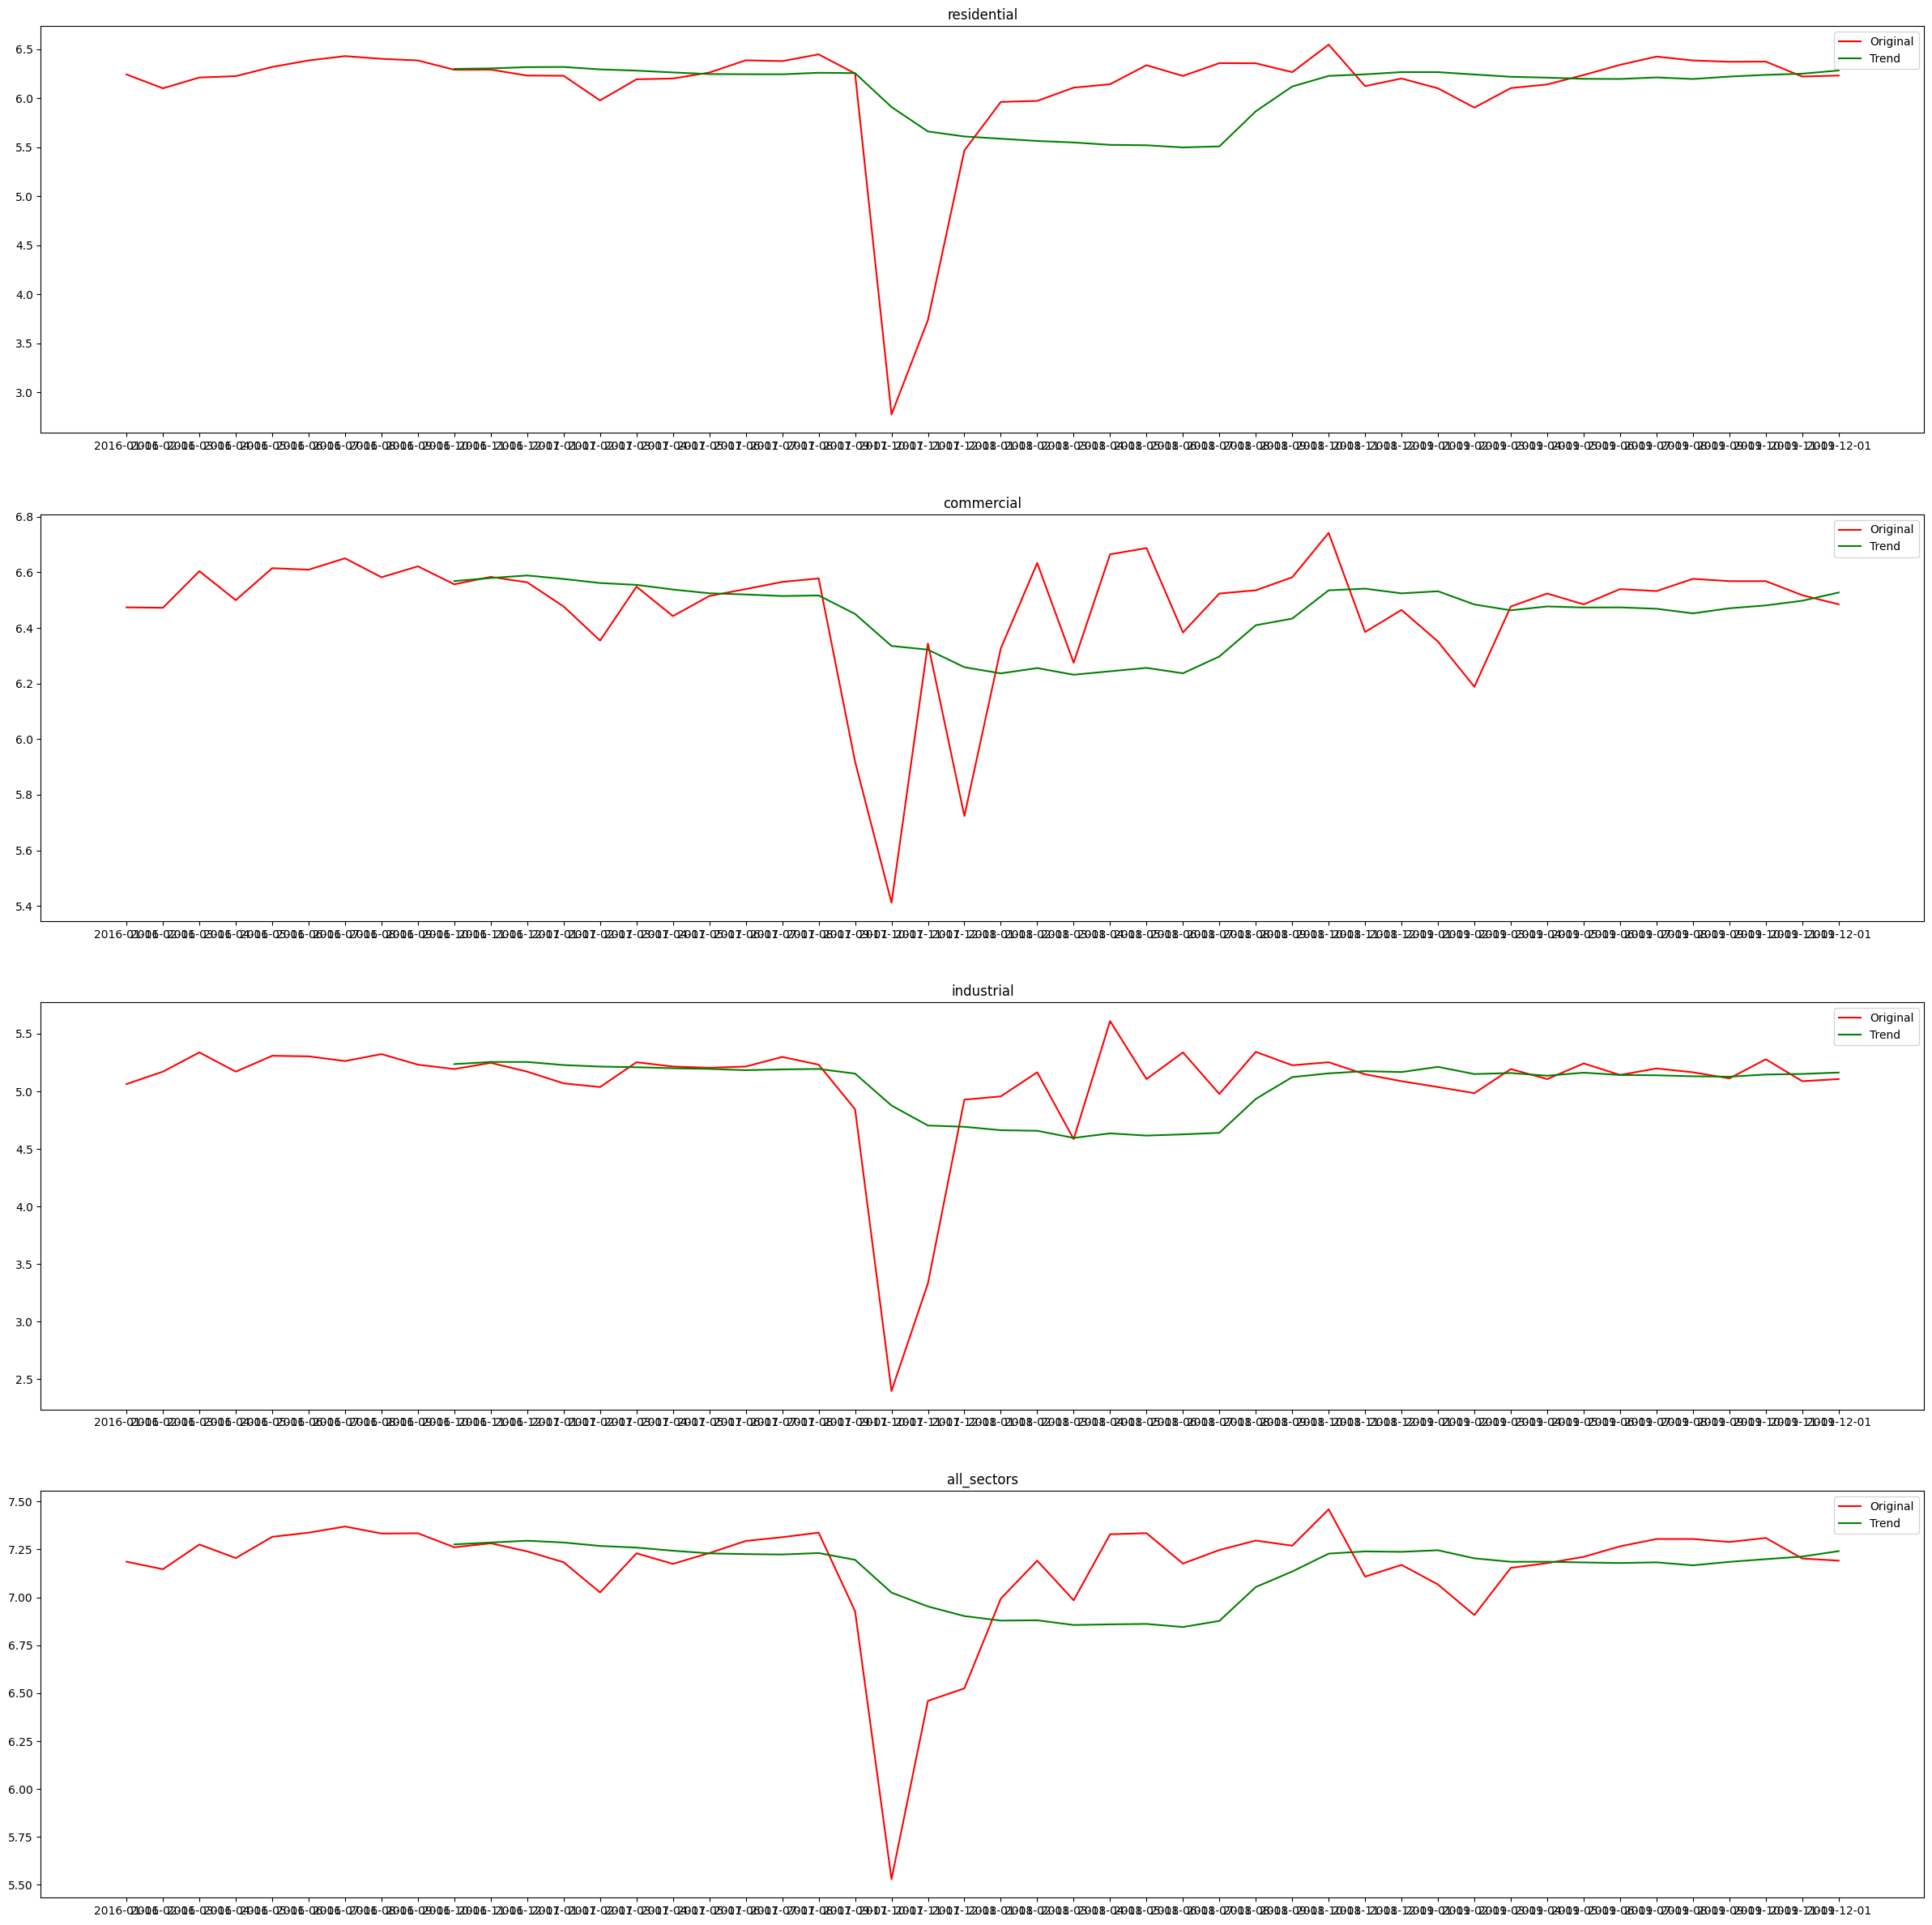

In [ ]:
def ts_graph(data):
    figure, axes = plt.subplots(4, figsize=(30, 30))
    mean_roll = data.rolling(window=10).mean()
    # std_roll = data.rolling(window=10).std()
    
    axes[0].plot(data["residential"], color="red", label="Original")
    axes[0].plot(mean_roll["residential"], color="green", label="Trend")
    # axes[0].plot(std_roll["residential"], color="blue", label="Seasonality")
    axes[0].set_title("residential")
    axes[0].legend()
    
    axes[1].plot(data["commercial"], color="red", label="Original")  
    axes[1].plot(mean_roll["commercial"], color="green", label="Trend")
    # axes[1].plot(std_roll["commercial"], color="blue", label="Seasonality")
    axes[1].set_title("commercial")
    axes[1].legend()
    
    axes[2].plot(data["industrial"], color="red", label="Original")
    axes[2].plot(mean_roll["industrial"], color="green", label="Trend")
    # axes[2].plot(std_roll["industrial"], color="blue", label="Seasonality")
    axes[2].set_title("industrial")
    axes[2].legend()
    
    axes[3].plot(data["all_sectors"], color="red", label="Original")
    axes[3].plot(mean_roll["all_sectors"], color="green", label="Trend")
    # axes[3].plot(std_roll["all_sectors"], color="blue", label="Seasonality")
    axes[3].set_title("all_sectors")
    axes[3].legend()
    
ts_graph(log_ndf)

In [ ]:
adf_test(log_ndf["residential"])
adf_test(log_ndf["commercial"])
adf_test(log_ndf["industrial"])
adf_test(log_ndf["all_sectors"])

1. ADF :  -4.043540448628124
2. P-Value :  0.001198919672038352
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 46


1. ADF :  -3.427943941133561
2. P-Value :  0.010042359548309704
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 44


1. ADF :  -3.9233305343607183
2. P-Value :  0.0018697008658711703
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47


1. ADF :  -3.584450561946213
2. P-Value :  0.006065353210025955
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47




In [ ]:
mean_roll = log_ndf.rolling(window=10).mean()
stat_data = log_ndf - mean_roll.shift(1)
stat_data.dropna(inplace=True)
stat_data

,residential,commercial,industrial,all_sectors
date,,,,
2016-11-01,-0.007268,0.014956,0.010780,0.005541
2016-12-01,-0.073164,-0.015549,-0.084203,-0.046193
2017-01-01,-0.088120,-0.111584,-0.185783,-0.112330
2017-02-01,-0.341503,-0.221489,-0.190871,-0.260628
2017-03-01,-0.101218,-0.013098,0.037803,-0.038392
2017-04-01,-0.080452,-0.112126,0.006065,-0.084902
2017-05-01,-0.001155,-0.023273,0.003973,-0.012053
2017-06-01,0.140802,0.015157,0.020770,0.064869
2017-07-01,0.133864,0.045080,0.114959,0.088243


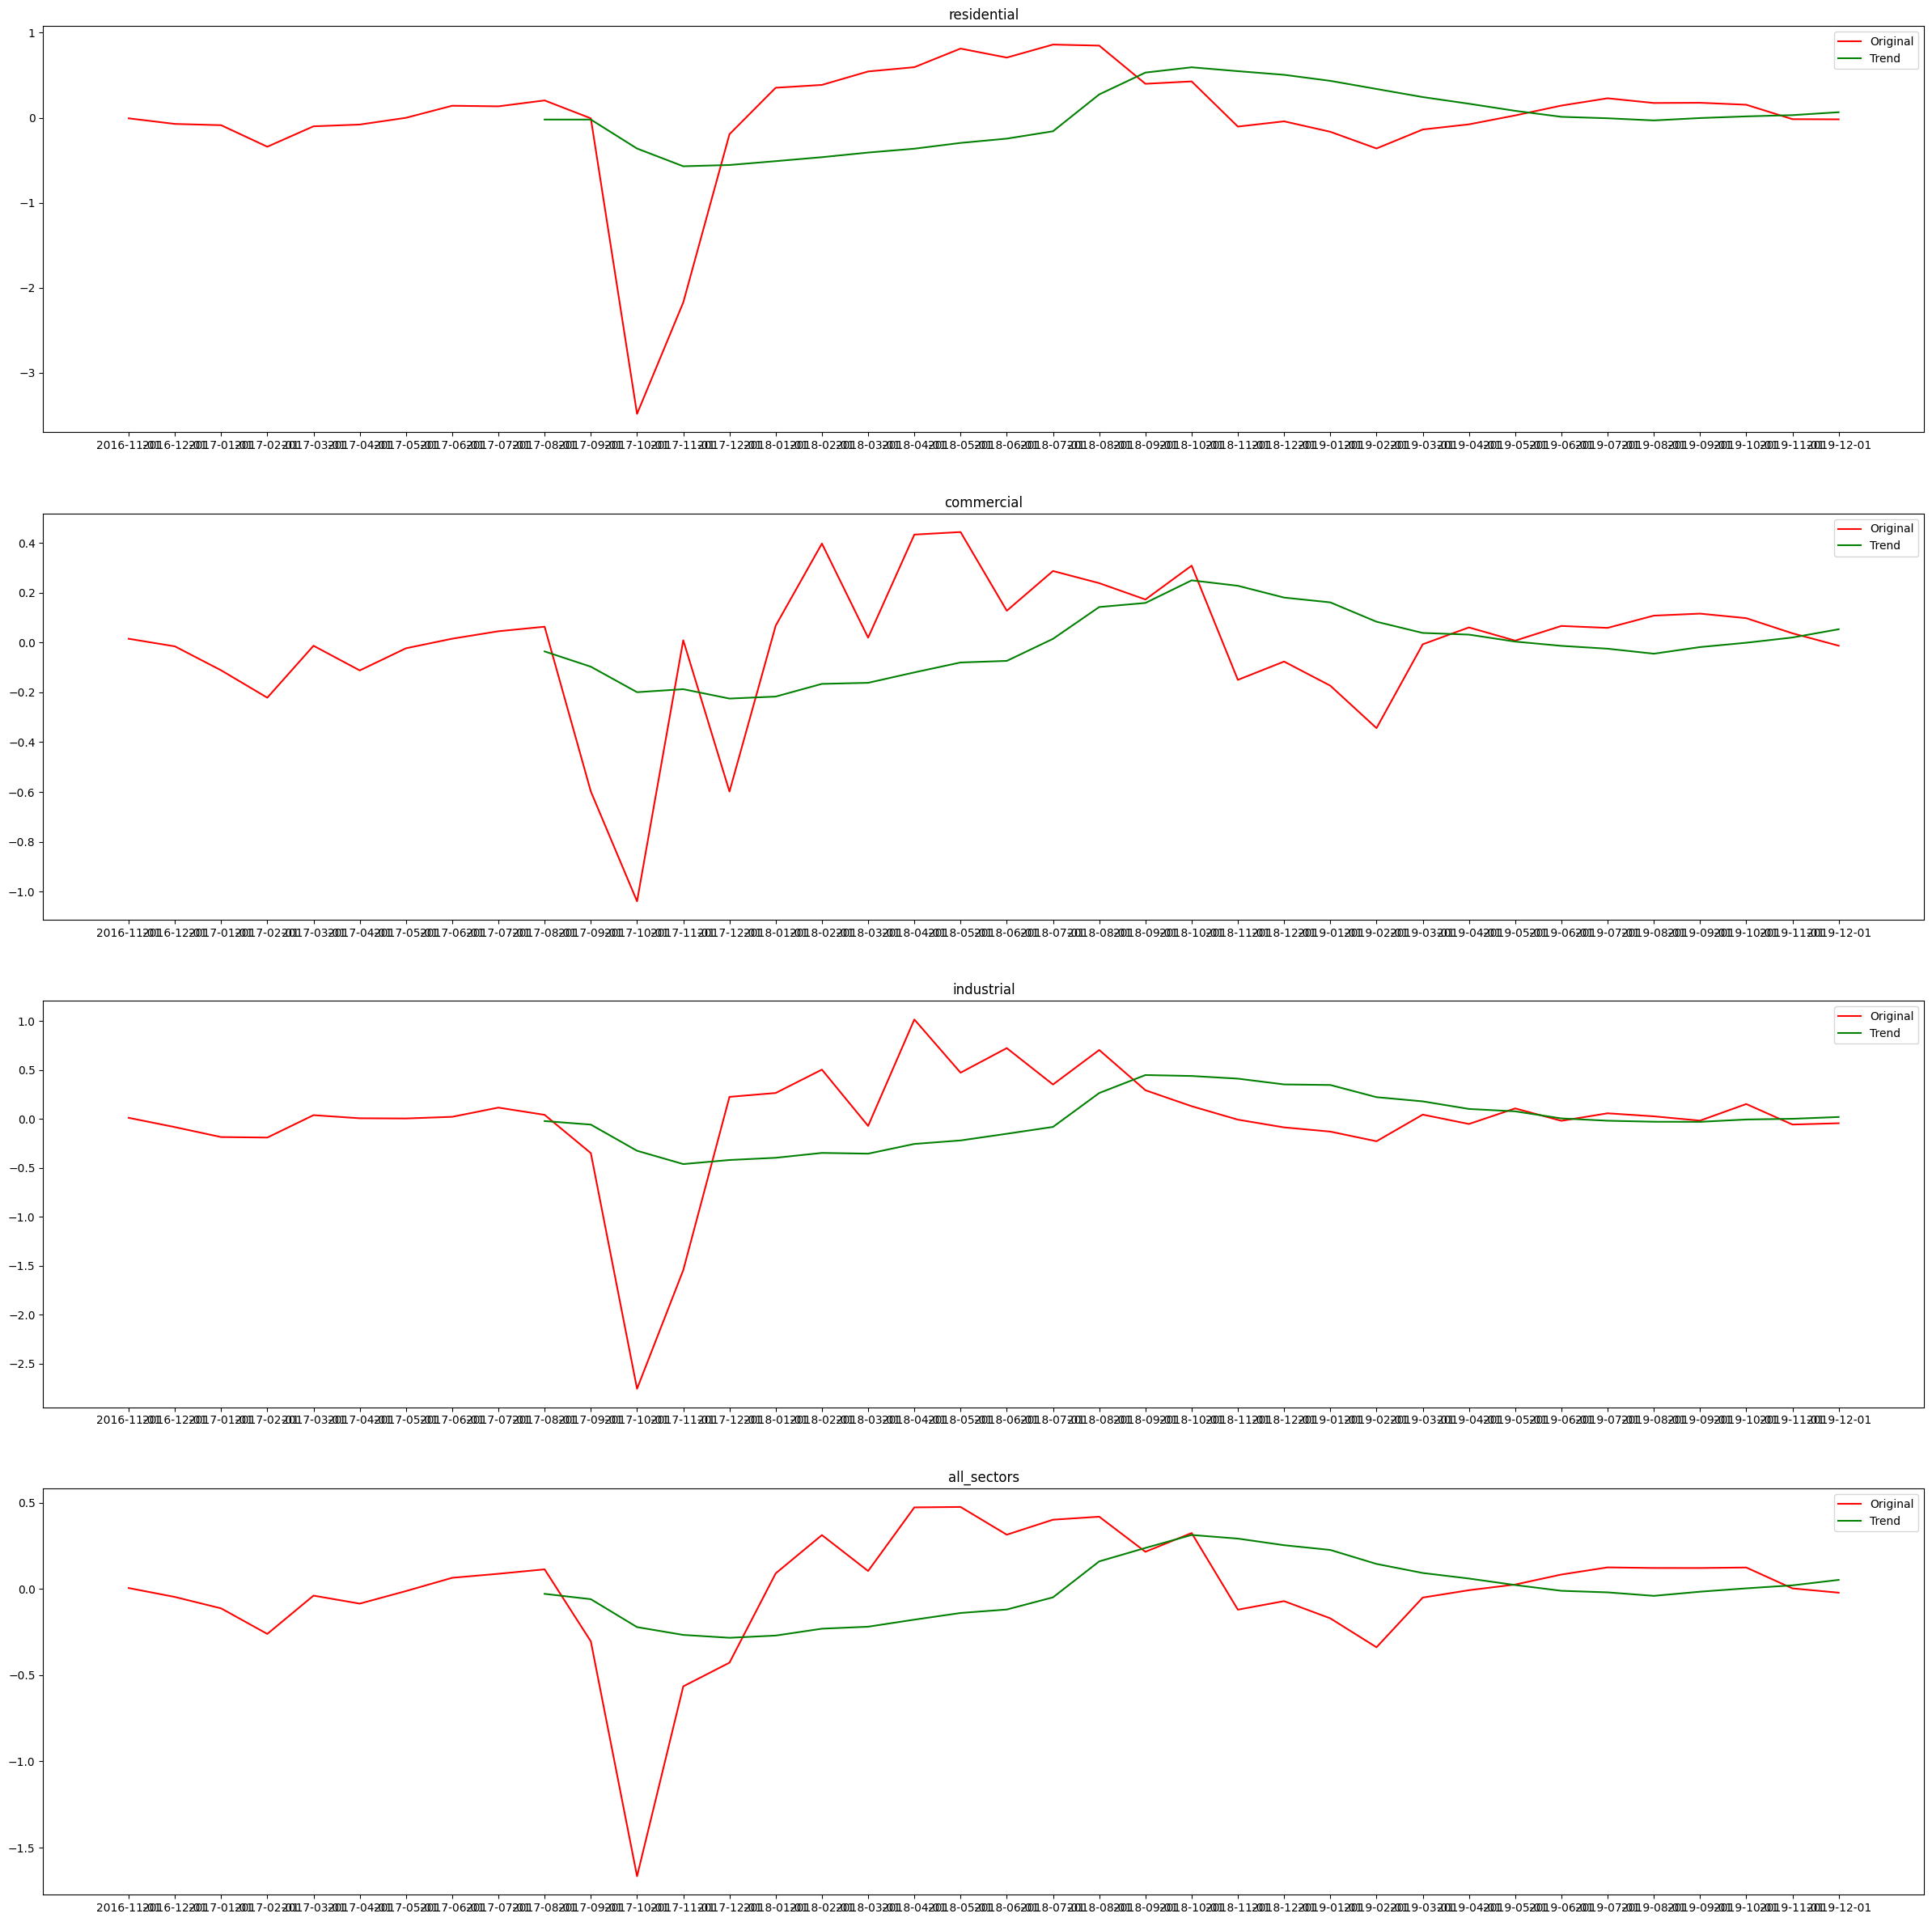

In [ ]:
ts_graph(stat_data)

In [ ]:
adf_test(stat_data["residential"])
adf_test(stat_data["commercial"])
adf_test(stat_data["industrial"])
adf_test(stat_data["all_sectors"])

1. ADF :  -3.570700719972417
2. P-Value :  0.006346514438257048
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 36


1. ADF :  -3.2394011777326144
2. P-Value :  0.017814303833933922
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 34


1. ADF :  -3.4275284763852842
2. P-Value :  0.0100554686695217
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 37


1. ADF :  -3.139766509567404
2. P-Value :  0.02374686407651789
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 37




In [ ]:

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = stat_data.drop(['all_sectors'], axis=1)
y = stat_data['all_sectors']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training Score: ", lr.score(X_train, y_train))
print("Testing Score: ", lr.score(X_test, y_test))

Training Score:  0.9951406106526851
Testing Score:  0.9911804385581915


In [ ]:
result = arima_result.resid
result.dropna(inplace=True)
adf_test(result)

1. ADF :  -9.87936006534624
2. P-Value :  3.8063425392135794e-17
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47




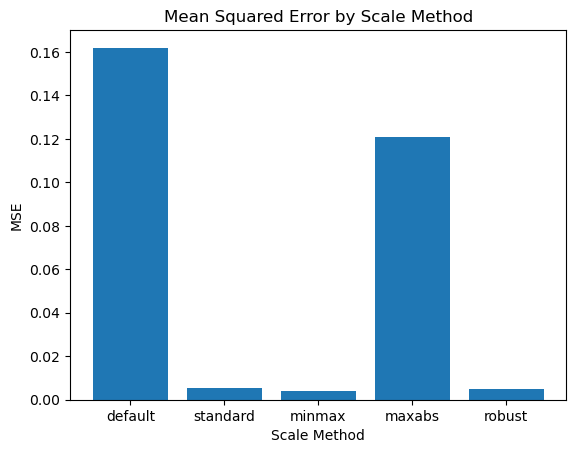

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
results = pd.read_csv('results.csv')

scales = results["Scale Method"].unique()
standard_mse = results[results["Scale Method"] == 'standard']["MSE"].mean()
minmax_mse = results[results["Scale Method"] == 'minmax']["MSE"].mean()
maxabs_mse = results[results["Scale Method"] == 'maxabs']["MSE"].mean()
robust_mse = results[results["Scale Method"] == 'robust']["MSE"].mean()
default_mse = results[results["Scale Method"] == 'default']["MSE"].mean()

def plot_mse(scales, mse, title):
    plt.bar(scales, mse)
    plt.title(title)
    plt.xlabel("Scale Method")
    plt.ylabel("MSE")
    plt.show()

plot_mse(scales, [standard_mse, minmax_mse, maxabs_mse, robust_mse, default_mse], "Mean Squared Error by Scale Method")

In [9]:
results.head()

,Model,Scale Method,Data Split,City,MSE,R2,MAE,MAPE
0,Linear Regression,default,0.2,Delhi,0.008560,0.719322,0.077667,36.930156
1,Linear Regression,standard,0.2,Delhi,0.295404,0.719322,0.456268,151.121754
2,Linear Regression,minmax,0.2,Delhi,0.010011,0.719322,0.083995,inf
3,Linear Regression,maxabs,0.2,Delhi,0.008560,0.719322,0.077667,36.930156
4,Linear Regression,robust,0.2,Delhi,0.116508,0.719322,0.286543,141.169757


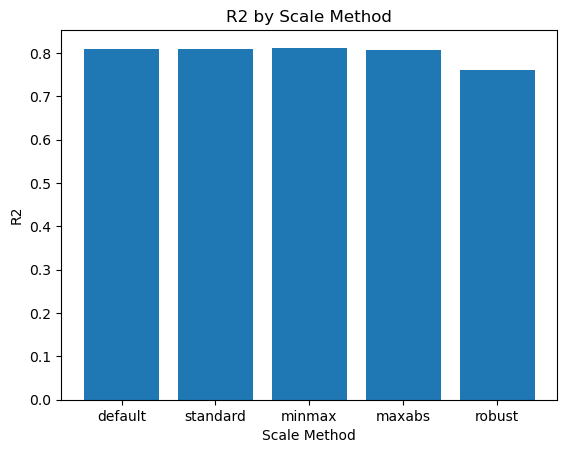

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
results = pd.read_csv('results.csv')

scales = results["Scale Method"].unique()
standard_mse = results[results["Scale Method"] == 'standard']["R2"].mean()
minmax_mse = results[results["Scale Method"] == 'minmax']["R2"].mean()
maxabs_mse = results[results["Scale Method"] == 'maxabs']["R2"].mean()
robust_mse = results[results["Scale Method"] == 'robust']["R2"].mean()
default_mse = results[results["Scale Method"] == 'default']["R2"].mean()

def plot_mse(scales, mse, title):
    plt.bar(scales, mse)
    plt.title(title)
    plt.xlabel("Scale Method")
    plt.ylabel("R2")
    plt.show()

plot_mse(scales, [standard_mse, minmax_mse, maxabs_mse, robust_mse, default_mse], "R2 by Scale Method")

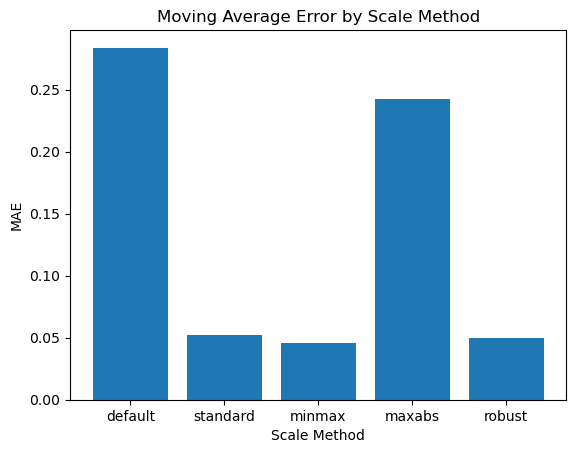

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
results = pd.read_csv('results.csv')

scales = results["Scale Method"].unique()
standard_mse = results[results["Scale Method"] == 'standard']["MAE"].mean()
minmax_mse = results[results["Scale Method"] == 'minmax']["MAE"].mean()
maxabs_mse = results[results["Scale Method"] == 'maxabs']["MAE"].mean()
robust_mse = results[results["Scale Method"] == 'robust']["MAE"].mean()
default_mse = results[results["Scale Method"] == 'default']["MAE"].mean()

def plot_mse(scales, mse, title):
    plt.bar(scales, mse)
    plt.title(title)
    plt.xlabel("Scale Method")
    plt.ylabel("MAE")
    plt.show()

plot_mse(scales, [standard_mse, minmax_mse, maxabs_mse, robust_mse, default_mse], "Moving Average Error by Scale Method")

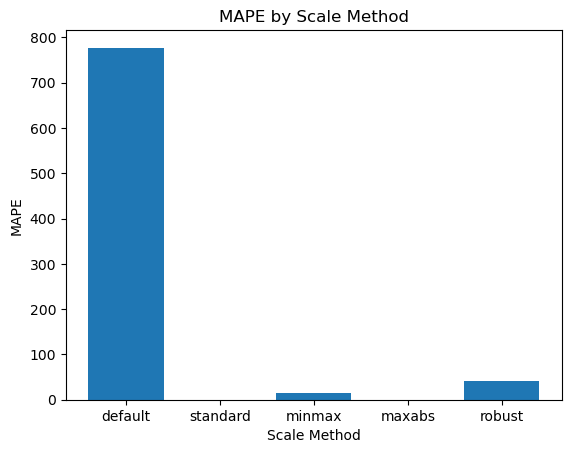

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
results = pd.read_csv('results.csv')

scales = results["Scale Method"].unique()
standard_mse = results[results["Scale Method"] == 'standard']["MAPE"].mean()
minmax_mse = results[results["Scale Method"] == 'minmax']["MAPE"].mean()
maxabs_mse = results[results["Scale Method"] == 'maxabs']["MAPE"].mean()
robust_mse = results[results["Scale Method"] == 'robust']["MAPE"].mean()
default_mse = results[results["Scale Method"] == 'default']["MAPE"].mean()

def plot_mse(scales, mse, title):
    plt.bar(scales, mse)
    plt.title(title)
    plt.xlabel("Scale Method")
    plt.ylabel("MAPE")
    plt.show()

plot_mse(scales, [standard_mse, minmax_mse, maxabs_mse, robust_mse, default_mse], "MAPE by Scale Method")